<a href="https://colab.research.google.com/github/fcignoli/Redes-Complejas-2-20222/blob/main/TP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Librerias necesarias
#!pip install nltk
!pip install PyPDF2

import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import networkx as nx
from PyPDF2 import PdfReader
import re       # libreria de expresiones regulares
import pandas as pd
nltk.download('punkt') # if necessary...
nltk.download("stopwords")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# PDF --> Texto --> Limpieza

In [16]:
def clean_text_round1(text):
    nombres = autor.split()
    titulos = titulo.split()
    for i in nombres:
      text = re.sub("\\b" + i + "\\b", "", text)
    for i in titulos:
      text = re.sub("\\b" + i + "\\b", "", text)
    # pasa las mayusculas del texto a minusculas
    text = text.lower()
    # reemplaza texto entre corchetes por espacio en blanco.. ¿ y \% no se..
    text = re.sub('\[.*?¿\]\%', ' ', text)
    # reemplaza singnos de puntuacion por espacio en blanco.. %s -> \S+ es cualquier caracter que no sea un espacio en blanco
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # remueve palabras que contienen numeros.
    text = re.sub('\w*\d\w*', '', text)
    return text

def clean_text_round2(text):
    # Sacamos comillas, los puntos suspensivos, <<, >>
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('–',"",text)
    text = re.sub('¿',"",text)
    text = re.sub(r"\b\w{2,3}\b", "", text) #eliminamos palabras con dos o tes letras
    text = re.sub(r"\s+", " ", text) #eliminamos espacios en blanco extras
    words_to_remove = ['roberto', 'arlt', 'embar','bioy','casares','adolfo','silvina','ocampo','bustos','honorio','domecq','martinez','guillermo','fernandez','macedonio','fogwill','rodolfo','ricardo','enrique','piglia']
    for word in words_to_remove:
      text = re.sub("\\b" + word + "\\b", "", text)
    return text

def pdfToText(filepath):
    """
    PDF ---> string
    """
    reader = PdfReader(filepath)
    number_of_pages = len(reader.pages)
    text = ''
    for i in range(number_of_pages):
        text+=reader.pages[i].extract_text()
    """
    Ahora limpiémoslo
    """
    text = clean_text_round1(text)
    text = clean_text_round2(text)
    return text
  

## TO-DO: ***textos*** ---> ***DataFrame***

In [ ]:
import os #para trabajar con la carpeta donde están todos los pdfs
from google.colab import drive
drive.mount('/content/drive')
"""
Link al drive donde subí los ejemplos: https://drive.google.com/drive/folders/1VKAZsJ38SXsidJzHprzUsKXWrakzoZ4H?usp=share_link
"""

"""
función que carga los textos a un dataframe "df" con las columnas texto titulo autor y año
"""
df = pd.DataFrame({"Text":[],
            "Title":[],
            "Author":[],
            "Age":[],
            'Grupo':[]},)
def textToDataFrame(texto,titulo,autor,ano,grupo):
    return df.append({"Text": texto,
            "Title": titulo,
            "Author": autor,
            "Age": ano , 
            'Grupo': grupo},
            ignore_index = True)

"""
La idea ahora es hacer un for loop que camine por nuestros archivos del drive donde están las obras
"""
for root, dirs, files in os.walk("/content/drive/My Drive/Literatura_Argentina"):
    for file in files:
        if file.endswith(".pdf"):
            if len(os.path.join(root, file).split("/")[-1].split("-")) == 4: # si la lista spliteada por '-' es igual a 4, es porque tiene atributo frupo.
              autor = os.path.join(root, file).split("/")[-1].split("-")[0]
              titulo = os.path.join(root, file).split("/")[-1].split("-")[1]
              ano = int(os.path.join(root, file).split("/")[-1].split("-")[2])
              grupo = os.path.join(root, file).split("/")[-1].split("-")[-1].split(".")[0] #entonces le agregamos el atributo grupo
            elif len(os.path.join(root, file).split("/")[-1].split("-")) == 3: # si la lista spliteada por '-' es igual a 3, es porque tiene atributo año.
              autor = os.path.join(root, file).split("/")[-1].split("-")[0]
              titulo = os.path.join(root, file).split("/")[-1].split("-")[1]
              ano = int(os.path.join(root, file).split("/")[-1].split("-")[-1].split(".")[0]) #entonces le agregamos el atributo año
              grupo = np.NaN
            else: # de lo contrario, le ponemos None
              autor = os.path.join(root, file).split("/")[-1].split("-")[0]
              titulo = os.path.join(root, file).split("/")[-1].split("-")[-1].split(".")[0]
              ano = np.NaN
              grupo = np.NaN
            try: 
              texto = pdfToText(os.path.join(root,file))
              df = textToDataFrame(texto,titulo,autor,ano,grupo) 
            except:
              print(os.path.join(root,file))
              pass

In [ ]:
#guardar el data frama en el drive
df.to_csv('/content/drive/My Drive/Literatura_Argentina/Data.csv', index=False)


In [17]:
import os #para trabajar con la carpeta donde están todos los pdfs
from google.colab import drive
drive.mount('/content/drive')
#cargar el dataframe del drive, habria que correr solo este
df=pd.read_csv('/content/drive/My Drive/Literatura_Argentina/Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Eliminemos la comunidad de textos partidos: 8 34 y 46
df.drop(8, inplace=True)
df.drop(34, inplace=True)
df.drop(46, inplace=True)
df.reset_index(drop = True, inplace = True)# reseteamos el ídice así no quedan huecos

## Cortemos en diferentes épocas la red

In [ ]:
# Tomamos solo datos del siglo XX
df= df[(df['Age'] >= 1800) & (df['Age'] < 2030)].copy()

# Creamos una columna que sea la década a la cual pertenece
df['decada'] = ((df['Age'] % 100) // 10) * 10

# Limpiamos los datos sin información sobre la década
df.dropna(subset = ['decada'], inplace = True)

# Reseteamos el índice
df.reset_index(drop = True, inplace = True)

## De ***Textos*** a ***Redes*** 
versión Gian

(13951, 14)


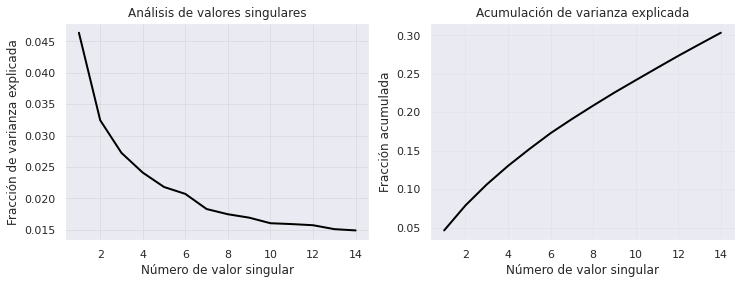

In [19]:
# Objetos de sklearn para hacer LSA
from sklearn.feature_extraction.text import CountVectorizer # Contador de frecuencia
from sklearn.feature_extraction.text import TfidfTransformer # Creador de tf-idf
from sklearn.decomposition import TruncatedSVD # Singular Value Decomposition
# Lista de stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
palabritas = ["algún","alguna","algunas","alguno","algunos","ambos","ampleamos","ante","antes","aquel","aquellas","aquellos","aqui","arriba","atras","bajo","bastante","bien","cada","cierta","ciertas","cierto","ciertos","como","con","conseguimos","conseguir","consigo","consigue","consiguen","consigues","cual","cuando","dentro","desde","donde","dos","el","ellas","ellos","empleais","emplean","emplear","empleas","empleo","en","encima","entonces","entre","era","eramos","eran","eras","eres","es","esta","estaba","estado","estais","estamos","estan","estoy","fin","fue","fueron","fui","fuimos","gueno","ha","hace","haceis","hacemos","hacen","hacer","haces","hago","incluso","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","la","largo","las","lo","los","mientras","mio","modo","muchos","muy","nos","nosotros","otro","para","pero","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","por","por", "qué","porque","primero","puede","pueden","puedo","quien","sabe","sabeis","sabemos","saben","saber","sabes","ser","si","siendo","sin","sobre","sois","solamente","solo","somos","soy","su","sus","también","teneis","tenemos","tener","tengo","tiempo","tiene","tienen","todo","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","tuyo","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","va","vais","valor","vamos","van","vaya","verdad","verdadera","verdadero","vosotras","vosotros","voy","yo","él","ésta","éstas","éste","éstos","última","últimas","último","últimos","a","añadió","aún","actualmente","adelante","además","afirmó","agregó","ahí","ahora","al","algo","alrededor","anterior","apenas","aproximadamente","aquí","así","aseguró","aunque","ayer","buen","buena","buenas","bueno","buenos","cómo","casi","cerca","cinco","comentó","conocer","consideró","considera","contra","cosas","creo","cuales","cualquier","cuanto","cuatro","cuenta","da","dado","dan","dar","de","debe","deben","debido","decir","dejó","del","demás","después","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","durante","e","ejemplo","ella","ello","embargo","encuentra","esa","esas","ese","eso","esos","está","están","estaban","estar","estará","estas","este","esto","estos","estuvo","ex","existe","existen","explicó","expresó","fuera","gran","grandes","había","habían","haber","habrá","hacerlo","hacia","haciendo","han","hasta","hay","haya","he","hecho","hemos","hicieron","hizo","hoy","hubo","igual","indicó","informó","junto","lado","le","les","llegó","lleva","llevar","luego","lugar","más","manera","manifestó","mayor","me","mediante","mejor","mencionó","menos","mi","misma","mismas","mismo","mismos","momento","mucha","muchas","mucho","nada","nadie","ni","ningún","ninguna","ningunas","ninguno","ningunos","no","nosotras","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","otra","otras","otros","parece","parte","partir","pasada","pasado","pesar","poca","pocas","poco","pocos","podrá","podrán","podría","podrían","poner","posible","próximo","próximos","primer","primera","primeros","principalmente","propia","propias","propio","propios","pudo","pueda","pues","qué","que","quedó","queremos","quién","quienes","quiere","realizó","realizado","realizar","respecto","sí","sólo","se","señaló","sea","sean","según","segunda","segundo","seis","será","serán","sería","sido","siempre","siete","sigue","siguiente","sino","sola","solas","solos","son","tal","tampoco","tan","tanto","tenía","tendrá","tendrán","tenga","tenido","tercera","toda","todas","todavía","todos","total","trata","través","tres","tuvo","usted","varias","varios","veces","ver","vez","y","ya",'mire','sabes','fierro','firpo','abraham','diga','dempsey','ledesma','viena','recienvenido','enía','hombr','undo', 'ucho',  'omento', 'oral', 'anos', 'ento', 'bres', 'herm','quier','incluso','poetas','poesía','poema','poemas','capítulo','prim', 'tiem', 'enos', 'ismo', 'bién', 'fernández', 'siem', 'iento', 'form', 'llam','güiraldes','gaucho','nicolás','sabés','tenés']
for i in palabritas:
  stopwords.append(i)
palabretes = ["mercedes","luisa","alberto","entoncesel", "quéel", "oliverio","últim","novela","daba","ejor","entos","dije","clara","rita","santiago","pedro","rema","raba","policiales","dela","barra","pancho","dora","mary","julia","molinari","fang","quizás","carlos", "pierre", "funes", "abenjaldún","andrés","martín","quizá","pablo","adela","brando", "lucía", "riera", "gabriela", "soldi", "diana","nula","lena","susano","tomatis","strauss","gutiérrez","elisa","mesiano","mahler","verani","dorm", "adem","asom","seldom","maría","juan","algún","alguna","algunas","alguno","algunos","ambos","ampleamos","ante","antes","aquel","aquellas","aquellos","aqui","arriba","atras","bajo","bastante","bien","cada","cierta","ciertas","cierto","ciertos","como","con","conseguimos","conseguir","consigo","consigue","consiguen","consigues","cual","cuando","dentro","desde","donde","dos","el","ellas","ellos","empleais","emplean","emplear","empleas","empleo","en","encima","entonces","entre","era","eramos","eran","eras","eres","es","esta","estaba","estado","estais","estamos","estan","estoy","fin","fue","fueron","fui","fuimos","gueno","ha","hace","haceis","hacemos","hacen","hacer","haces","hago","incluso","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","la","largo","las","lo","los","mientras","mio","modo","muchos","muy","nos","nosotros","otro","para","pero","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","por","por", "qué","porque","primero","puede","pueden","puedo","quien","sabe","sabeis","sabemos","saben","saber","sabes","ser","si","siendo","sin","sobre","sois","solamente","solo","somos","soy","su","sus","también","teneis","tenemos","tener","tengo","tiempo","tiene","tienen","todo","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","tuyo","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","va","vais","valor","vamos","van","vaya","verdad","verdadera","verdadero","vosotras","vosotros","voy","yo","él","ésta","éstas","éste","éstos","última","últimas","último","últimos","a","añadió","aún","actualmente","adelante","además","afirmó","agregó","ahí","ahora","al","algo","alrededor","anterior","apenas","aproximadamente","aquí","así","aseguró","aunque","ayer","buen","buena","buenas","bueno","buenos","cómo","casi","cerca","cinco","comentó","conocer","consideró","considera","contra","cosas","creo","cuales","cualquier","cuanto","cuatro","cuenta","da","dado","dan","dar","de","debe","deben","debido","decir","dejó","del","demás","después","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","durante","e","ejemplo","ella","ello","embargo","encuentra","esa","esas","ese","eso","esos","está","están","estaban","estar","estará","estas","este","esto","estos","estuvo","ex","existe","existen","explicó","expresó","fuera","gran","grandes","había","habían","haber","habrá","hacerlo","hacia","haciendo","han","hasta","hay","haya","he","hecho","hemos","hicieron","hizo","hoy","hubo","igual","indicó","informó","junto","lado","le","les","llegó","lleva","llevar","luego","lugar","más","manera","manifestó","mayor","me","mediante","mejor","mencionó","menos","mi","misma","mismas","mismo","mismos","momento","mucha","muchas","mucho","nada","nadie","ni","ningún","ninguna","ningunas","ninguno","ningunos","no","nosotras","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","otra","otras","otros","parece","parte","partir","pasada","pasado","pesar","poca","pocas","poco","pocos","podrá","podrán","podría","podrían","poner","posible","próximo","próximos","primer","primera","primeros","principalmente","propia","propias","propio","propios","pudo","pueda","pues","qué","que","quedó","queremos","quién","quienes","quiere","realizó","realizado","realizar","respecto","sí","sólo","se","señaló","sea","sean","según","segunda","segundo","seis","será","serán","sería","sido","siempre","siete","sigue","siguiente","sino","sola","solas","solos","son","tal","tampoco","tan","tanto","tenía","tendrá","tendrán","tenga","tenido","tercera","toda","todas","todavía","todos","total","trata","través","tres","tuvo","usted","varias","varios","veces","ver","vez","y","ya","menos","casi","mismo","olivari","sino", "todas", "toda","cada","ahora", "entonces", "sólo", "podía","aquel","cómo", "aquél","dijo", "después", "siempre", "hacia", "bien","carla","carmen","luis","mauro", "chica", "lucio", "gloria", "mario","isabel", "nene", "hassam", "delia", "dorda", "malito", "brena", "nurit","rengo","silva", "iscar", "jaime",  "mereles"]
for i in palabretes:
  stopwords.append(i)



from scipy.spatial.distance import cosine as cosine_distance
import heapq
# Creamos el objeto contador de palabras, pidiéndole que remueve
# las stopwords, los términos que aparecen en un único documento (min_df)
# y los términos que aparecen en más del 70% de los documentos (max_df).
# Esto es para eliminar palabras raras (o errores de tipeo) y
# términos que seguramente son stopwords no incluídos en la lista
count = CountVectorizer(min_df = 8, max_df = 0.5, stop_words = stopwords)

# Ajustamos con los datos. Acá especificamente creamos una matriz documentos-términos
x_count = count.fit_transform(df['Text'])

# Dimensions de la matriz doc-tér
# print(x_count.shape)

# Creamos el objeto tf-idf. Le decimos además que devuelva los
# vectores documento con norma euclídea igual a 1 (norm = 'l2')
tfidf = TfidfTransformer(norm = 'l2')

# Creamos la matriz tf-idf a partir de la matriz de frecuencias
x_tfidf = tfidf.fit_transform(x_count)

# Dimensión del espacio reducido
n_components =14

# Creación del objeto SVD
svd = TruncatedSVD(n_components = n_components)

# Ajuste con los datos y descripción en el espacio reducido
# Trabajamos con la matriz traspuesta
x_svd = svd.fit_transform(x_tfidf.T)

# Dimensión de la matriz de datos en el espacio reducido
print(x_svd.shape)

# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = svd.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].plot(range(1, len(evr) + 1), evr, '-', color = 'black' , linewidth = 2)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de valor singular')
ax[0].set_title('Análisis de valores singulares')
ax[0].grid(linestyle = '-', linewidth = 0.5, color = 'lightgrey')
ax[1].plot(range(1, len(evr) + 1), evr.cumsum(), '-', color = 'black', linewidth = 2)
ax[1].set_xlabel('Número de valor singular')
ax[1].set_ylabel('Fracción acumulada')
ax[1].set_title('Acumulación de varianza explicada')

ax[1].grid(linestyle = '-', linewidth = 0.5, color = 'lightgrey', alpha=0.5)
plt.show()





In [20]:
labels_autores = {}
labels_año = {}
labels_titulo = {}
labels_grupo = {}
for i in df.index:
  labels_autores.update({i:df['Author'][i].split()[0]}) #Creamos un diccionario de índice - autor
  labels_año.update({i:df['Age'][i]})# índice - año
  labels_titulo.update({i:df['Title'][i]})
  labels_grupo.update({i:df['Grupo'][i]})




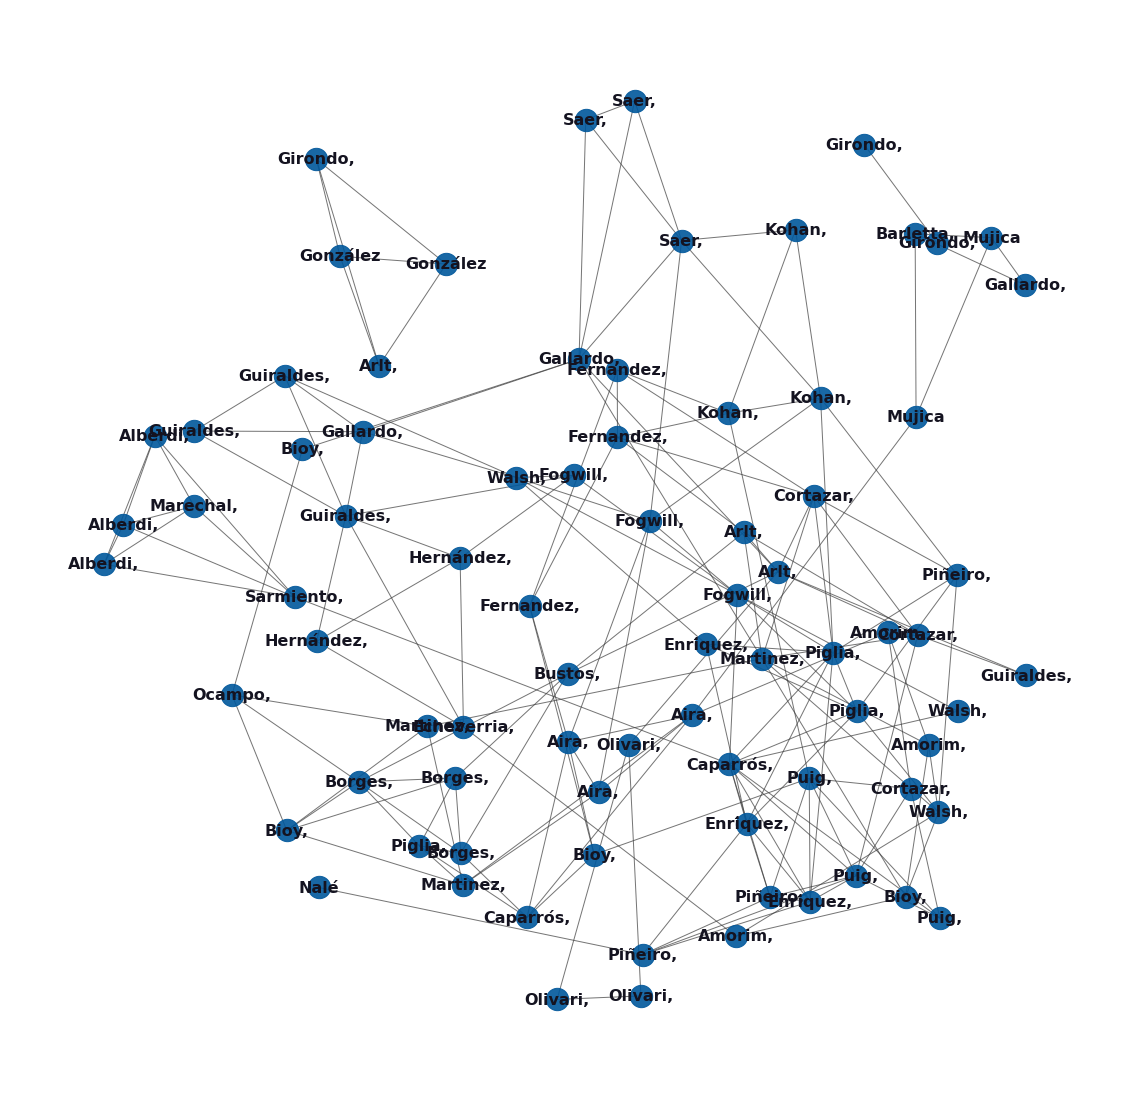

In [21]:
red = []
for i in df['Text']:
    index = df[df['Text'] == i].index[0]
    similarities = [1.00 - cosine_distance(svd.components_.T[index], svd.components_.T[i]) for i in range(svd.components_.shape[1])]
    red.append(similarities)

matriz = np.array(red)

matriz = (1+matriz)/2
matriz[matriz < .75] = 0 # los que tienen una similaridad menor a 0.8, ledamos 0
matriz[matriz == 1] = 0
#matriz[matriz >= .70] = 1 # los que tienen una similaridad mayor a 0.05, le damos 1. de esta manera lo binarizamos

G = nx.from_numpy_matrix(matriz, create_using = nx.Graph)

#pos = nx.layout.fruchterman_reingold_layout(G,k=0.3)
#pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G,k=0.7)
pos = nx.spring_layout(G,k=4/np.sqrt(G.order()))
fig, ax = plt.subplots(figsize = (20, 20))
ax.axis('off')
colores=[]
for i in np.arange(0,len(df),1):
  if df['Grupo'][i]==' Florida':
    color='red'
  elif df['Grupo'][i]==' Boedo':
    color='blue'
  else:
    color='black'
  colores=np.append((colores),(color))

colors=[]
for i in np.arange(0,len(df),1):
  year=df['Age'][i]
  if year>=1800 and year<1920:
    color = 'orange'
  if year>=1920 and year<1960:
    color='red'
  elif year>=1960 and year<2030:
    color='green'
  else:
    color='black'
  colors=np.append((colors),(color))
nx.draw_networkx_nodes(G, pos, node_color='#00579B', node_size=500,alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color='#3C3C3C',alpha=0.7)
nx.draw_networkx_labels(G, pos, labels_autores,font_color='#141320', font_size=16,font_weight='bold',alpha=1)
#nx.draw(G,pos)

#nx.draw(G, with_labels=True)
plt.show()



In [22]:
sims_list = []
for i in df['Text']:
    index = df[df['Text'] == i].index[0]
    matrix = np.zeros(len(df['Text']))
    std = []
    for j in range(100):
      similarities = [1.00 - cosine_distance(svd.components_.T[index], svd.components_.T[i]) for i in range(svd.components_.shape[1])]
      matrix+=np.array(similarities)
      std.append(similarities[0])
      similarities = []
    promedio = matrix/100
    sims_list.append(promedio)

#Calcular el desvío estándar de std o varianza



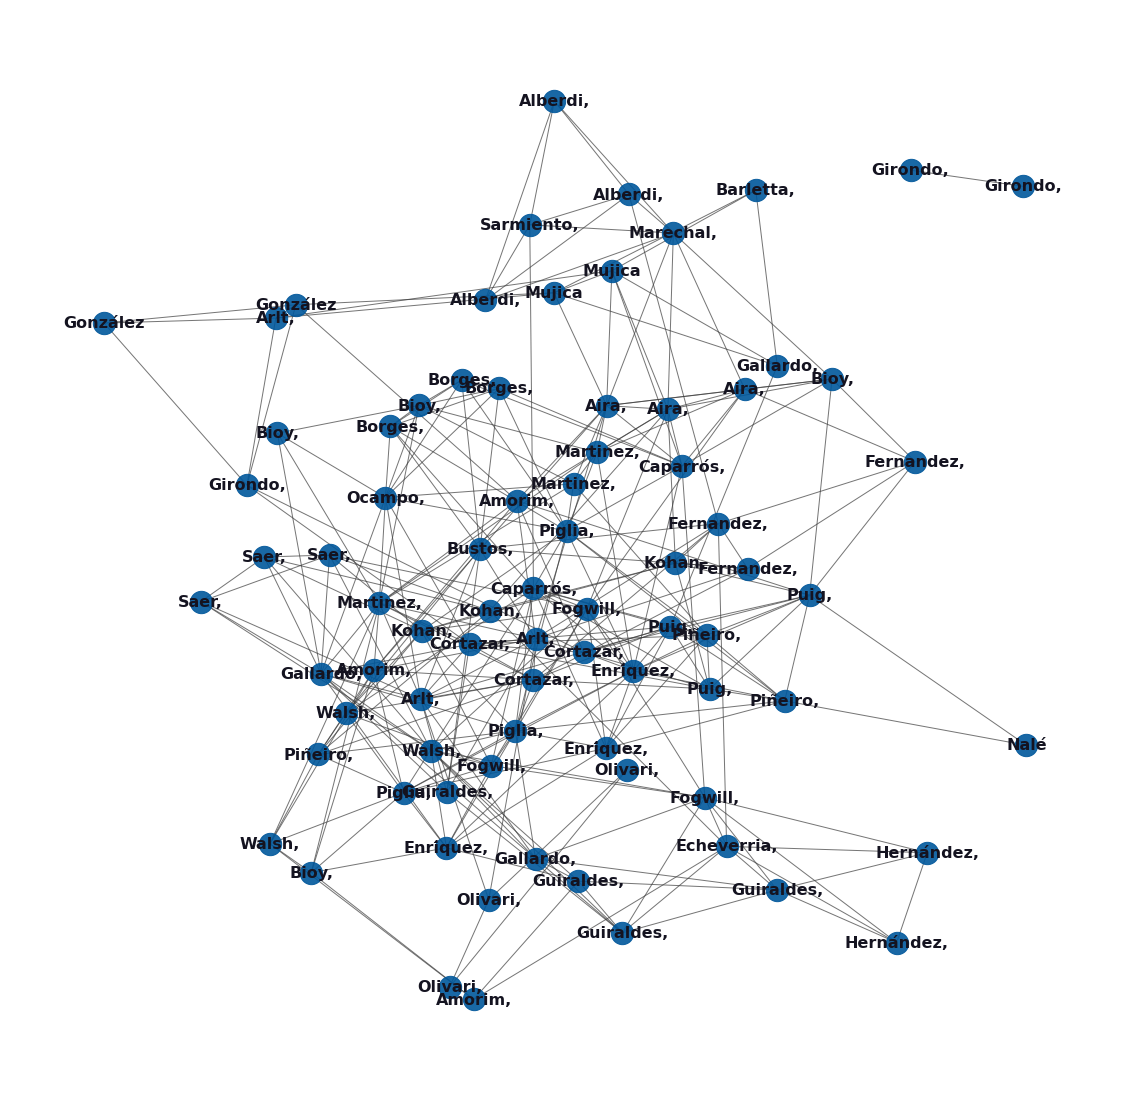

In [23]:
matrix = np.array(sims_list)

matrix = (1+matrix)/2
matrix[matrix < .70] = 0 # los que tienen una similaridad menor a 0.8, ledamos 0
matrix[matrix == 1] = 0
#matrix[matrix >= .70] = 1 # los que tienen una similaridad mayor a 0.05, le damos 1. de esta manera lo binarizamos

G_2 = nx.from_numpy_matrix(matrix, create_using = nx.Graph)

#pos = nx.layout.fruchterman_reingold_layout(G_2,k=0.3)
#pos = nx.kamada_kawai_layout(G_2)
#pos = nx.spring_layout(G_2,k=0.7)
pos = nx.spring_layout(G_2,k=4/np.sqrt(G_2.order()))
fig, ax = plt.subplots(figsize = (20, 20))
ax.axis('off')
colores=[]
for i in np.arange(0,len(df),1):
  if df['Grupo'][i]==' Florida':
    color='red'
  elif df['Grupo'][i]==' Boedo':
    color='blue'
  else:
    color='black'
  colores=np.append((colores),(color))

colors=[]
for i in np.arange(0,len(df),1):
  year=df['Age'][i]
  if year>=1800 and year<1920:
    color = 'orange'
  if year>=1920 and year<1960:
    color='red'
  elif year>=1960 and year<2030:
    color='green'
  else:
    color='black'
  colors=np.append((colors),(color))
nx.draw_networkx_nodes(G_2, pos, node_color='#00579B', node_size=500,alpha=0.9)
nx.draw_networkx_edges(G_2, pos, edge_color='#3C3C3C',alpha=0.7)
nx.draw_networkx_labels(G_2, pos, labels_autores,font_color='#141320', font_size=16,font_weight='bold',alpha=1)
#nx.draw(G_2,pos)

#nx.draw(G_2, with_labels=True)
plt.show()



In [ ]:
len(sims_list[0])

80

## Análisis temporal

## Análisis de tópicos

In [ ]:
# Algoritmos de descomposición de tópicos
from sklearn.decomposition import NMF 
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
n_topic_components = 8
# Construímos el objeto NMF con los tópicos indicados 
nmf = NMF(n_components = n_topic_components)

# Aplicamos sobre nuestros datos
x_nmf = nmf.fit_transform(x_tfidf)


# Dimensión de la matriz transformada
print(x_nmf.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


(83, 8)


In [ ]:
# Objeto índice: término de nuestro vocabulario
vocabulary = {item: key for key, item in count.vocabulary_.items()}

# Para cada componente
for n in range(n_topic_components):
  # Ordenamos una lista del largo de nuestro vocabulario según el peso en cada componente y nos quedamos con los primeros 10
  list_sorted = sorted(range(nmf.components_.shape[1]), reverse = True, key = lambda x: nmf.components_[n][x])[:10]

  # Printeamos los términos asociados a los valores más grande de cada una de las componentes
  print(', '.join([vocabulary[i] for i in list_sorted]))
  print('\n')

auto, mamá, pibe, papá, departamento, nena, querés, fotos, foto, pileta


gobierno, patria, república, rosas, constitución, leyes, social, gobiernos, civilización, alberdi


estancia, viuda, paisano, núñez, ánima, padrino, tientos, cristiano, fogón, cochero


indio, ande, usté, juez, indios, pampa, poncho, tropa, cantor, rancho


daniel, comisario, laberinto, pregunté, lector, dioses, biblioteca, mago, talvez, símbolo


doña, adán, felipe, carro, cura, murmura, patrona, capilla, niña, observa


musa, amada, infiel, angustia, arrabal, grotesco, sentimental, senos, rabia, lírico


gallego, españa, obreros, paisaje, tranvía, millares, pupilas, sirena, tumba, fervor




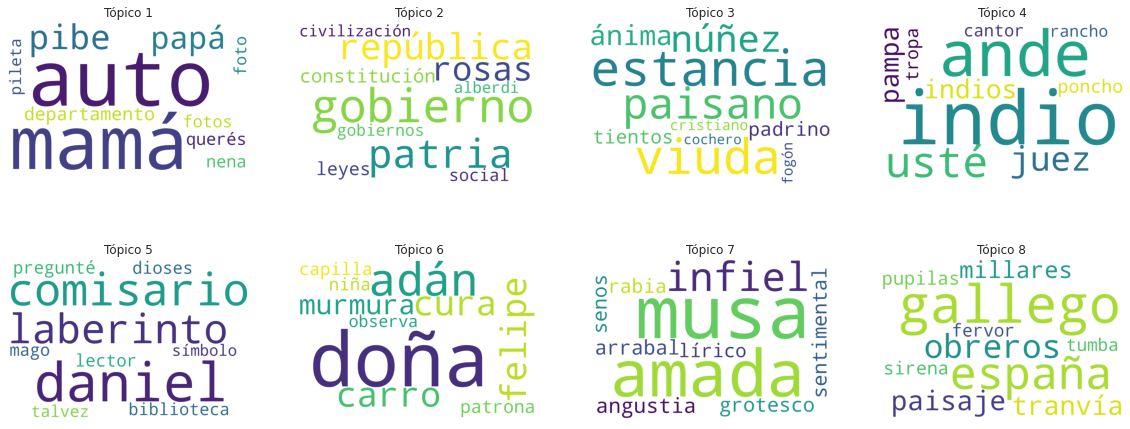

In [ ]:
# Creo la figura
fig, axs = plt.subplots(2,4, figsize = (20,8))

# Recorro para todas las componentes
for n in range(n_topic_components):

  # 10 términos más pesados
  list_sorted = sorted(range(len(vocabulary)), reverse = True, key = lambda x: nmf.components_[n][x])[:10]

  # Diccionario término: peso
  comp_dict = {vocabulary[i]: nmf.components_[n][i] for i in list_sorted}

  # Creo el wordlcoud
  wc = WordCloud(**wc_atributos # De esta forma, le estoy diciendo a la función que expanda el diccionario de atributos de forma tal de que entienda lo que quiero que haga
                 ).generate_from_frequencies(comp_dict)

  axs[n//4][n%4].set_title('Tópico {}'.format(n+1))
  axs[n//4][n%4].imshow(wc)
  axs[n//4][n%4].axis('off')

plt.show()

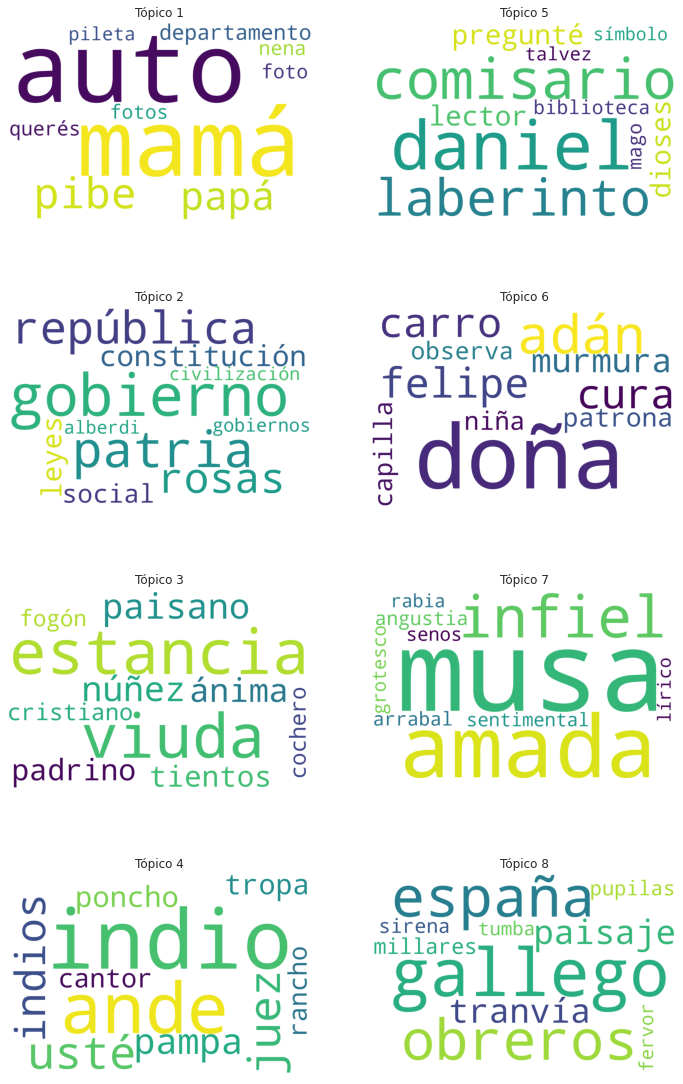

In [ ]:
# Creo la figura
fig, axs = plt.subplots(4,2, figsize = (12,20))

# Recorro para todas las componentes
for n in range(n_topic_components):

  # 10 términos más pesados
  list_sorted = sorted(range(len(vocabulary)), reverse = True, key = lambda x: nmf.components_[n][x])[:10]

  # Diccionario término: peso
  comp_dict = {vocabulary[i]: nmf.components_[n][i] for i in list_sorted}

  # Creo el wordlcoud
  wc = WordCloud(**wc_atributos # De esta forma, le estoy diciendo a la función que expanda el diccionario de atributos de forma tal de que entienda lo que quiero que haga
                 ).generate_from_frequencies(comp_dict)

  axs[n%4][n//4].set_title('Tópico {}'.format(n+1))
  axs[n%4][n//4].imshow(wc)
  axs[n%4][n//4].axis('off')

plt.show()

In [ ]:
# Normalizador
from sklearn.preprocessing import Normalizer 

# Creamos un objeto para normalizar a que la suma dé 1
norm = Normalizer('l1')

# Sobreescribimos sobre la matriz de documentos-tópicos
x_nmf = norm.fit_transform(x_nmf)

# Guardemos en el dataframe esta información
for n in range(n_topic_components):
  df['nmf_comp{}'.format(n)] = x_nmf[:,n]



## Análisis temporal

In [ ]:
# Tomamos solo datos del siglo XX
df_sxx= df[(df['Age'] >= 1900) & (df['Age'] < 2000)].copy()

# Creamos una columna que sea la década a la cual pertenece
df_sxx['decada'] = ((df_sxx['Age'] % 100) // 10) * 10
#df_sxx['quinquenio'] = ((df_sxx['Age'] % 100) // 5)*5
# Limpiamos los datos sin información sobre la década
df_sxx.dropna(subset = ['decada'], inplace = True)

# Reseteamos el índice
df_sxx.reset_index(drop = True, inplace = True)

df_sxx

Text  \
0     probablemente carlota tuvo idea cierto todos...   
1    caso viejitos voladores  diputado estos años ...   
2    memoria paulina  siempre quise a primeros rec...   
3    sseeiiss pprroobblleemmaass ppaarraa ddoonn i...   
4    digitalizado palabras liliana heker a primera...   
5    fogwillcantos marineros pampasde pampas publi...   
6     pichiciegos a andrés v franciscojosé y pilar...   
7   eldoctorhubermanllegaalapartadohoteldebosquede...   
8    autobiografía convocadas prome lamejor litera...   
9     fernandezdigitalizado httpwwwlibrodotcomlibr...   
10   cortázar espartakus cortazar bestiario primer...   
11   final juego cortázar final jueg o índice i co...   
12   cortázar armas secretas digitalizado spartakk...   
13   enríquez editorial galerna isbn foto tapa nor...   
14   mujer walshel coronel elogia puntualidad punt...   
15   puig beso mujer arañaprólogo pepe martínprólo...   
16  annotation texto remite a pasado argentino a o...   
17   soledades nueva york lisiado y acompañan ambo...   
18   musa mala pata nicolás olivari dedicatoria de...   
19   ceguera borges aunq pocos sepan precio quetuv...   
20   borges scanned proofed muerte bookz bibliotec...   
21   relatosseis relatos güiraldesricardo güiralde...   
22  leónidas barletta perroscentro editor america ...   
23  e n r i q u e a m o r i m gosn o v e l asagaev...   
24   amorim sagael copyright © saga egmont rights ...   
25  ficcionesjorge luis borgesel jardín senderosqu...   
26     diversos y exagerados rumores desparramados...   
27   aguafuertes gallegas   digitalizado httpwwwli...   
28    espasa calpe buenos aires colección austra l...   
29       ...   
30  rosaura güiraldes i lobos pueblo tranquilo med...   
31   segundo sombra güiraldes nota preliminar obra...   
32   autopsia creso a carlos a velazco amigo velaz...   
33   historia ciudad porteña dondela visión estéti...   
34  a poco tarde y empieza a anochecer personajesd...   
35    walsh libros hacen libre wwwelortibaorgrodol...   
36   walsh oficios terrestres temprana y cenicient...   
37  este volumen está formado novelas cortas escri...   
38   pigliasinopsisesta novela cuenta historia rea...   
39   primer libro  publicado originalmente esta ed...   
40   marcó hito extraordinario poesía lenguacastel...   
41   calle agujer o media y puedenobservarse rasgo...   
42  nicolás oliv aripoesías colección pingüe patri...   
43  carne solcuentos escritor nicolás oliv arique ...   
44  annotation cuatro relatos integran volumen hue...   
45   rincón junto unos hombres asocian imágenes yr...   
46   alberdi fragmento preliminar estudio derecho ...   
47  esta novela registra aven tura argentino evade...   
48   naciones europa alzan escalada absolutismo yf...   
49   espantapájaros protagonistas cosas sino losme...   
50   tensa partida ajedrez adolescente derrotado u...   
51  farsa tres actos sobre mujer dispuesta a casar...   

                                              Title  \
0                                          Noumeno    
1                El Caso De Los Viejitos Voladores    
2                            En Memoria De Paulina    
3            Seis problemas para don Isidro Parodi    
4                                  Infierno Grande    
5                Cantos De Marineros En Las Pampas    
6                                  Los pichiciegos    
7                               Los que aman odian    
8                          Autobiografía de Irene    
9                          Papeles De Recienvenido    
10                                       Bestiario    
11                                 Final del Juego    
12                              Las Armas Secretas    
13                                Bajar es lo peor    
14                                       Esa Mujer    
15                      El Beso De La Mujer Araña    
16                               Boquitas pintadas    
17    Maldición eterna a quien lea e

In [ ]:
df_decada = df_sxx.groupby('decada').mean()

# Inspeccionemoslo
df_decada

Age  nmf_comp0  nmf_comp1  nmf_comp2  nmf_comp3  nmf_comp4  \
decada                                                                       
20.0    1925.625000   0.093545   0.020171   0.346426   0.423825   0.063117   
30.0    1934.000000   0.187928   0.072247   0.075339   0.597868   0.032724   
40.0    1944.888889   0.559783   0.060471   0.116705   0.020860   0.124213   
50.0    1952.375000   0.310937   0.004158   0.229097   0.167684   0.115434   
60.0    1965.375000   0.157047   0.155071   0.160993   0.081799   0.015846   
70.0    1973.000000   0.267783   0.166283   0.150060   0.107090   0.000000   
80.0    1984.000000   0.370670   0.020271   0.126293   0.066069   0.005586   
90.0    1996.000000   0.113859   0.091496   0.236397   0.000000   0.158621   

        nmf_comp5  
decada             
20.0     0.052916  
30.0     0.033894  
40.0     0.117968  
50.0     0.172690  
60.0     0.429244  
70.0     0.308784  
80.0     0.411111  
90.0     0.399626

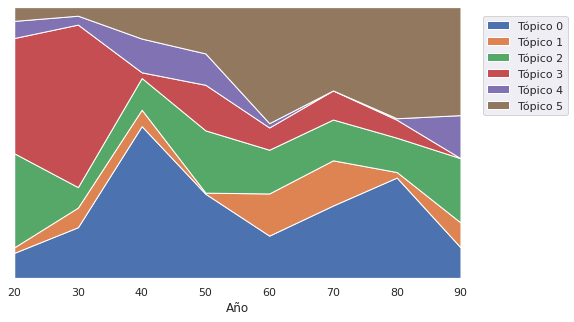

In [ ]:
# El eje x es la década
x = df_decada.index

# El eje y son las distribuciones
y = df_decada[['nmf_comp{}'.format(i) for i in range(n_topic_components)]].to_numpy()

plt.figure(figsize = (8,5))
plt.stackplot(x, y.T) # Stackplot: sirve para graficar distribuciones
plt.xlim([20, 90])
plt.ylim([0, 1.00])
plt.yticks([])
plt.xlabel('Año')
plt.legend(['Tópico {}'.format(i) for i in range(n_topic_components)], loc = (1.05, 0.60))
plt.show()

In [ ]:
y.T

array([[0.06114208, 0.10410739, 0.22250523, 0.13508897, 0.50597893,
        0.62699837, 0.39070529, 0.07183843, 0.55920757, 0.09993318,
        0.52449251, 0.01026459, 0.34803223, 0.42973807, 0.57114425,
        0.        ],
       [0.01509293, 0.02189873, 0.01978904, 0.15107425, 0.02634076,
        0.10351747, 0.00555508, 0.        , 0.02644486, 0.1738914 ,
        0.23192148, 0.10202251, 0.01396531, 0.03656668, 0.        ,
        0.11475175],
       [0.28498726, 0.36714841, 0.06742036, 0.0873519 , 0.15094933,
        0.0749702 , 0.29887895, 0.02107171, 0.        , 0.18496826,
        0.24358601, 0.05726137, 0.17227176, 0.01372625, 0.        ,
        0.29614485],
       [0.53663821, 0.38664551, 0.57972581, 0.62648488, 0.00790294,
        0.03722447, 0.2061733 , 0.05325312, 0.04254729, 0.08792908,
        0.        , 0.21597341, 0.09077166, 0.00551551, 0.        ,
        0.        ],
       [0.00697886, 0.08209964, 0.05470573, 0.        , 0.19570507,
        0.0351168 , 0.00598119, 

## Análisis de comunidad

#### Focalicémonos en la red gigante

In [ ]:
componentes= nx.connected_components(G) #tomamos las componentes de la
lista_componentes = [G.subgraph(componente) for componente in 
                     sorted(componentes, key=len, reverse=True)]
G_gigante= lista_componentes[0] #Tomo la componente gigante

In [ ]:
len(G_gigante)

62

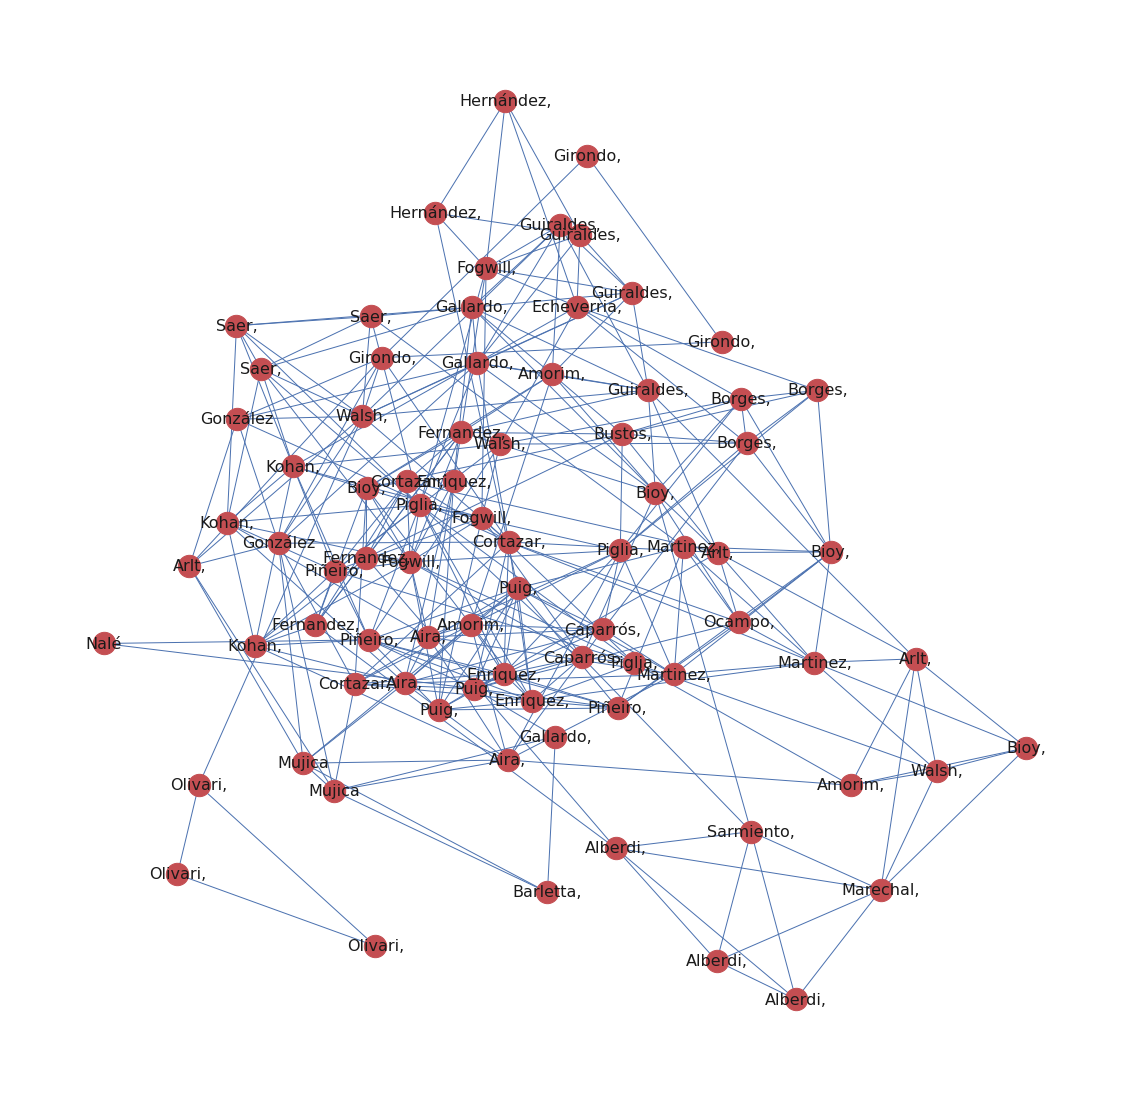

In [ ]:
fig, ax = plt.subplots(figsize = (20, 20))
ax.axis('off')
nx.draw_networkx_nodes(G_gigante, pos, node_color='r', node_size=500)
nx.draw_networkx_edges(G_gigante, pos, edge_color='b')
nx.draw_networkx_labels(G_gigante, pos, labels_autores, font_size=16)

plt.show()



In [ ]:
grados = G.degree()

In [ ]:
dic = list(dict(grados).values())
dic.index(7)
df['Author'][24]
diametr = nx.diameter(G_gigante)
diametr
#agregar cuales tienen distancia 6

8

In [ ]:
!pip install bbox
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
!pip install igraph
!pip install python-louvain


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libgif-dev is already the newest version (5.1.4-2ubuntu0.1).
libgif-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libpixman-1-dev libxcb-shm0-dev
0 upgraded, 4 newly installed, 0 to remove and 7 not upgraded.
Need to get 930 kB of archives.
After this operation, 3,986 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubu

In [ ]:
import igraph as ig
from community import community_louvain as com
import cairo # Importo Cairo
import bbox
# Esto es para que funcione Cairo
from IPython.display import SVG, display, Image
def show_svg(file):
    display(SVG(filename=file))

In [ ]:
# Fastgreedy 

G_ig = ig.Graph.from_networkx(G_gigante)
com_fg = G_ig.community_fastgreedy(weights=None)

In [ ]:
print(com_fg) # Cantidad de elementos y de mergeos hechos
print(f'La cantidad de comunas que maximiza la modularidad es: {com_fg.optimal_count}')
print(f'La modularidad de dicha partición es: {com_fg.as_clustering().modularity}')
print(f'La separación en comunas, considerando 5 comunidades es: \n {com_fg.as_clustering()}')

Dendrogram, 28 elements, 27 merges

6 11 9 10 15 16 8 14 25 27 26 1 2 3 20 23 24 4 12 0 22 21 19 17 7 18 5 13
| |  | |  |  |  | |  |  |  |  | | | |  |  |  | |  | |  |  |  |  | |  | |
| |  | |  `--'  | |  `--'  |  | | | |  |  |  | |  `-'  |  |  |  `-'  | |
| |  | |   |    | |   |    |  | | | |  |  |  | |   |   |  |  |   |   | |
| |  | |   |    | |   `----'  `-' | |  |  |  | |   |   |  |  |   |   | |
| |  | |   |    | |     |      |  | |  |  |  | |   |   |  |  |   |   | |
| |  `-'   |    `-'     |      `--' |  |  |  `-'   `---'  |  |   |   | |
| |   |    |     |      |       |   |  |  |   |      |    |  |   |   | |
| |   |    |     `------'       |   `--'  |   |      |    |  |   |   `-'
| |   |    |        |           |    |    |   |      |    |  |   |    | 
| |   |    |        |           |    `----'   |      |    |  |   |    | 
| |   |    |        |           |      |      |      |    |  |   |    | 
`-'   |    |        |           |      `------'      |    |  |   |    | 
 |    |    |  

In [ ]:
# Infomap

com_ip = G_ig.community_infomap()

print(com_ip)

Clustering with 28 elements and 5 clusters
[0] 0, 7, 13, 17, 18, 19, 21, 22
[1] 1, 2, 3, 4, 5
[2] 6, 8, 9, 11, 14
[3] 10, 12, 20, 23, 24
[4] 15, 16, 25, 26, 27


In [ ]:
#betweeness
com_bt = G_ig.community_edge_betweenness(clusters = None, directed = False, weights = None)
print('Betweenness')
print(com_bt) # Cantidad de elementos y de mergeos hechos
print(f'La cantidad de comunas que maximiza la modularidad es: {com_bt.optimal_count}')
print(f'La modularidad de dicha partición es: {com_bt.as_clustering().modularity}')
print(f'La separación en comunas, considerando 5 comunidades es: \n {com_bt.as_clustering()}')

Betweenness
Dendrogram, 28 elements, 27 merges

1 5 2 3 4 7 13 17 18 19 0 21 22 8 9 6 11 14 15 16 25 26 27 10 12 20 23 24
| | | | | | |  |  |  |  | |  |  | | | |  |  |  |  |  |  |  |  |  |  |  |
| | | | | | |  |  |  |  | |  |  | | | |  |  |  |  |  `--'  |  |  |  |  |
| | | | | | |  |  |  |  | |  |  | | | |  |  |  |  |   |    |  |  |  |  |
| | | | | | |  |  |  |  | `--'  | | | |  |  |  |  `---'    |  |  |  `--'
| | | | | | |  |  |  |  |  |    | | | |  |  |  |    |      |  |  |   |  
| | | | | | |  |  `--'  |  |    | | | |  |  |  |    |      |  |  `---'  
| | | | | | |  |   |    |  |    | | | |  |  |  |    |      |  |    |    
| | | | | | |  `---'    |  |    | | | `--'  `--'    |      |  |    |    
| | | | | | |    |      |  |    | | |  |     |      |      |  |    |    
`-' | `-' | `----'      |  |    | | `--'     |      |      |  `----'    
 |  |  |  |   |         |  |    | |  |       |      |      |    |       
 |  `--'  |   |         `--'    | `--'       |      |      `----'       
 |

In [ ]:
# Función para llevar el objeto vertex cluster a diccionario
def cluster_to_dict(cluster, g):
    dic = {}
    for i, c in enumerate(sorted(list(cluster), key = len, reverse = True)):
        for n in c:
            dic[g.vs[n]['_nx_name']] = i
    return dic
# 

### Plot

In [ ]:
# louvain 
com_lv = com.best_partition(G)
print('----------------------')
print(com_lv) # Es un diccionario!
while com.modularity(com_lv, G)<0.66:
       com_lv=com.best_partition(G)
print(f'La modularidad de esta partición es: {com.modularity(com_lv, G)}')

----------------------
{0: 0, 1: 0, 2: 6, 3: 0, 4: 3, 5: 4, 6: 4, 7: 5, 8: 0, 9: 6, 10: 6, 11: 3, 12: 3, 13: 3, 14: 11, 15: 11, 16: 10, 17: 9, 18: 10, 19: 10, 20: 10, 21: 6, 22: 3, 23: 12, 24: 0, 25: 0, 26: 4, 27: 1, 28: 3, 29: 3, 30: 0, 31: 2, 32: 7, 33: 0, 34: 7, 35: 0, 36: 4, 37: 8, 38: 1, 39: 1, 40: 10, 41: 10, 42: 10, 43: 5, 44: 7, 45: 0, 46: 5, 47: 5, 48: 7, 49: 7, 50: 12, 51: 12, 52: 6, 53: 6, 54: 8, 55: 4, 56: 4, 57: 5, 58: 6, 59: 1, 60: 6, 61: 5, 62: 7, 63: 11, 64: 11, 65: 11, 66: 6, 67: 6, 68: 11}
La modularidad de esta partición es: 0.7668459734581508


In [ ]:
import pickle #Save the result to a file 
from google.colab import files


In [ ]:
#Save the result to a file 
with open('com_lv.pkl', 'wb') as output:
    pickle.dump(com_lv, output, pickle.HIGHEST_PROTOCOL) 

In [ ]:
uploaded = files.upload() 

#Load the result from the file 
with open('com_lv.pkl', 'rb') as input: 
    com_lv = pickle.load(input)

Saving com_lv.pkl to com_lv (1).pkl


In [ ]:
colores=dict()
for v in G_gigante.nodes():
  if df['Age'][v]<1920:
    colores[v] = 'blue'
  elif 1920<df['Age'][v]<1955:
    colores[v] = 'green'
  elif 1955<=df['Age'][v]<2002:
    colores[v] = 'yellow'
  else:
    colores[v] = 'red'


In [ ]:
start_color = (255, 0, 0) #Red
end_color = (0, 0, 255) #Blue

#Generate a range of values between the start and end color
values = range(1860, 2021)

#Create an empty dictionary
gradient_dict = {}

#Loop through the values and calculate the color for each value
for value in values:
    #Calculate the RGB value for the current value
    red = start_color[0] + (end_color[0] - start_color[0]) * value/100
    green = start_color[1] + (end_color[1] - start_color[1]) * value/100
    blue = start_color[2] + (end_color[2] - start_color[2]) * value/100

    #Add the RGB value to the dictionary
    gradient_dict[value] = (red, green, blue)

In [ ]:
gradient_dict  

{1860: (-4488.0, 0.0, 4743.0),
 1861: (-4490.55, 0.0, 4745.55),
 1862: (-4493.1, 0.0, 4748.1),
 1863: (-4495.65, 0.0, 4750.65),
 1864: (-4498.2, 0.0, 4753.2),
 1865: (-4500.75, 0.0, 4755.75),
 1866: (-4503.3, 0.0, 4758.3),
 1867: (-4505.85, 0.0, 4760.85),
 1868: (-4508.4, 0.0, 4763.4),
 1869: (-4510.95, 0.0, 4765.95),
 1870: (-4513.5, 0.0, 4768.5),
 1871: (-4516.05, 0.0, 4771.05),
 1872: (-4518.6, 0.0, 4773.6),
 1873: (-4521.15, 0.0, 4776.15),
 1874: (-4523.7, 0.0, 4778.7),
 1875: (-4526.25, 0.0, 4781.25),
 1876: (-4528.8, 0.0, 4783.8),
 1877: (-4531.35, 0.0, 4786.35),
 1878: (-4533.9, 0.0, 4788.9),
 1879: (-4536.45, 0.0, 4791.45),
 1880: (-4539.0, 0.0, 4794.0),
 1881: (-4541.55, 0.0, 4796.55),
 1882: (-4544.1, 0.0, 4799.1),
 1883: (-4546.65, 0.0, 4801.65),
 1884: (-4549.2, 0.0, 4804.2),
 1885: (-4551.75, 0.0, 4806.75),
 1886: (-4554.3, 0.0, 4809.3),
 1887: (-4556.85, 0.0, 4811.85),
 1888: (-4559.4, 0.0, 4814.4),
 1889: (-4561.95, 0.0, 4816.95),
 1890: (-4564.5, 0.0, 4819.5),
 1891: (-

ValueError: ignored

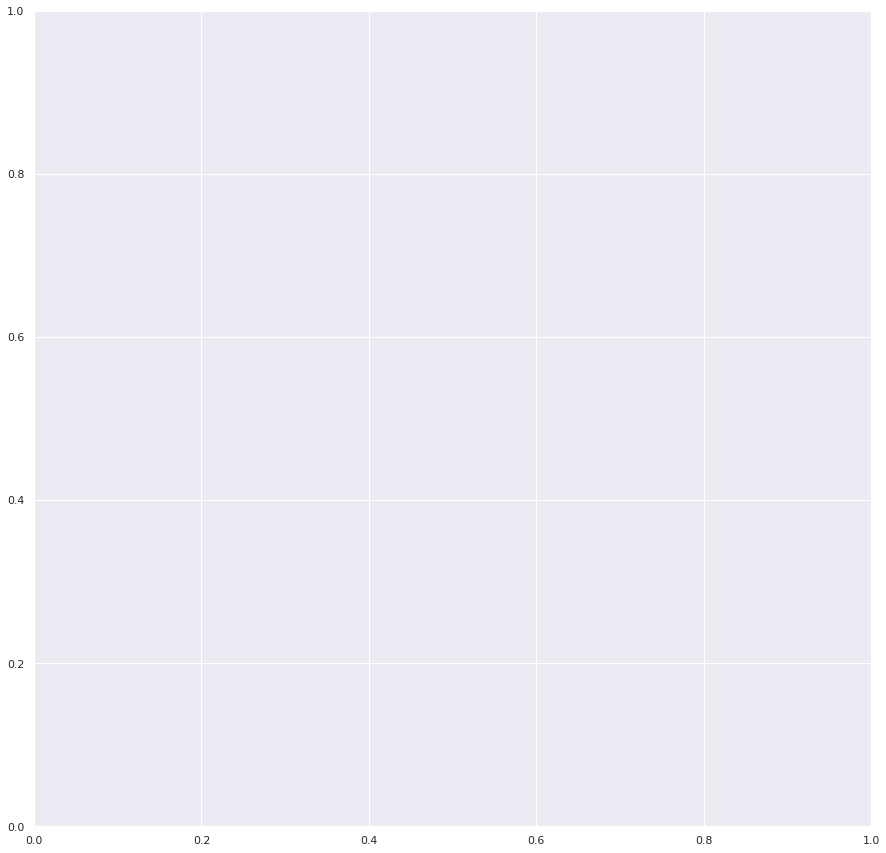

In [ ]:
#pos = nx.layout.fruchterman_reingold_layout(G_gigante, iterations=50)
pos = nx.spring_layout(G_gigante,k=2/np.sqrt(G.order()))
#pos = nx.circular_layout(G_gigante)
particiones = [com_lv]
import matplotlib as mpl
from matplotlib.colors import Normalize
fig, axs = plt.subplots(1, 1, figsize = (15, 15))
map = mpl.colors.Normalize(vmin=1860, vmax=2022)
for i, ax in enumerate(fig.axes):
    nx.draw_networkx_nodes(G_gigante,
                           pos = pos,
                           #node_color = [plt.get_cmap('tab10')(particiones[i][v]) for v in G_gigante.nodes()],
#                           node_color = [plt.get_cmap('viridis')(df['Age'][v]) for v in G_gigante.nodes()],
                           node_color = [gradient_dict[df['Age'][v]] for v in G_gigante.nodes()],
                           ax = ax,
                           node_size = 350,
                           alpha= .99)
    nx.draw_networkx_edges(G_gigante,
                           pos = pos,
                           ax = ax,
                           alpha = .2)
#    nx.draw_networkx_labels(G_gigante,
#                       pos = pos,
#                       ax = ax
#                       labels = {v: str(df['Author'][v].split()[0]) for v in G_gigante.nodes()},font_size=16,font_weight='bold',alpha=1)
    plt.grid(False)
    ax.axis('off')
    ax = plt.gca() # Get current axes
    ax.set_alpha(0.0) # Set background transparency
plt.show()


In [ ]:
#centralidad y letalidad


def abrir_esenciales(nombre_archivo):
    archivo = open(nombre_archivo)
    data = []
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)  
    data = data[2:]
    esenciales = []
    for linea in data:
      if len(linea)>2:
        esenciales.append(linea[1])
    return(esenciales)


def segundo_elemento(lista):
  return lista[1]

def hacer_lista_grados_ordenada(Red):
  grados = Red.degree()
  grados = list(grados)
  grados.sort(key = segundo_elemento, reverse = True)
  return [nodo for (nodo,grado) in grados]

def ordenar_diccionario_por_valor(diccionario):
  return [key for key, value in sorted(diccionario.items(), key=lambda item: item[1], reverse=True)]



### Centralidad de la red completa

In [ ]:
Red = G.copy()
diccionario_centralidad_grado = nx.degree_centrality(Red)
diccionario_centralidad_intermediatez = nx.betweenness_centrality(Red, k=None, normalized=True, weight=None, endpoints=False, seed=None)
#diccionario_centralidad_autovalor = nx.eigenvector_centrality(Red, max_iter=100, tol=1e-06, nstart=None, weight='weight')
diccionario_centralidad_cercania = nx.closeness_centrality(Red, u=None, distance=None, wf_improved=True)


def sacar_max_centralidad_degree(Red):
  # Calcula la centralidad de autovalor
  centralidad = nx.degree_centrality(Red)
  # Devuelve el nodo de máxima centralidad
  return max(centralidad, key=centralidad.get)

def sacar_max_centralidad_betweenness(Red):
  # Calcula la centralidad de autovalor
  centralidad = nx.betweenness_centrality(Red, k=None, normalized=True, weight=None, endpoints=False, seed=None)
  # Devuelve el nodo de máxima centralidad
  return max(centralidad, key=centralidad.get)

def sacar_max_centralidad_eigenvalue(Red):
  # Calcula la centralidad de autovalor
  centralidad = nx.eigenvector_centrality(Red, max_iter=100, tol=1e-06, nstart=None, weight='weight')
  # Devuelve el nodo de máxima centralidad
  return max(centralidad, key=centralidad.get)

def sacar_max_centralidad_closeness(Red):
  # Calcula la centralidad de autovalor
  centralidad = nx.closeness_centrality(Red, u=None, distance=None, wf_improved=True)
  # Devuelve el nodo de máxima centralidad
  return max(centralidad, key=centralidad.get)
print('Obras de Mayor centralidad segun la centralidad analizada')
print('Grado:',labels_titulo[sacar_max_centralidad_degree(G)],labels_autores[sacar_max_centralidad_degree(G)])
print('Intermediatez:',labels_titulo[sacar_max_centralidad_betweenness(G)],labels_autores[sacar_max_centralidad_betweenness(G)])
#print('Autovalor:',labels_titulo[sacar_max_centralidad_eigenvalue(G)],labels_autores[sacar_max_centralidad_eigenvalue(G)])
print('Cercania:',labels_titulo[sacar_max_centralidad_closeness(G)],labels_autores[sacar_max_centralidad_closeness(G)])


Obras de Mayor centralidad segun la centralidad analizada
Grado:  Bestiario  Cortazar,
Intermediatez:  Amor Y Anarquia  Caparrós,
Cercania:  Bestiario  Cortazar,


In [ ]:
max(diccionario_centralidad_grado)

79

In [ ]:
labels = {v: str(df['Author'][v]) for v in G_gigante.nodes()}
labels

{0: 'Bioy, Casares Adolfo ',
 2: 'Bioy, Casares Adolfo ',
 3: 'Bustos, Honorio Domecq ',
 4: 'Martinez, Guillermo ',
 5: 'Fogwill, Rodolfo Enrique ',
 6: 'Fogwill, Rodolfo Enrique ',
 7: 'Fernandez, Macedonio ',
 8: 'Bioy, Casares Adolfo . Ocampo, Silvina ',
 9: 'Ocampo, Silvina ',
 11: 'Fernandez, Macedonio ',
 12: 'Echeverria, Esteban ',
 13: 'Fogwill, Rodolfo Enrique ',
 15: 'Cortazar, Julio ',
 16: 'Cortazar, Julio ',
 17: 'Enríquez, Mariana ',
 18: 'Enríquez, Mariana ',
 19: 'Walsh, Rodolfo ',
 20: 'Caparrós, Martín ',
 21: 'Puig, Manuel ',
 22: 'Puig, Manuel ',
 23: 'Puig, Manuel ',
 24: 'Saer, Juan José ',
 25: 'Piñeiro, Claudia ',
 28: 'Borges, Jorge Luis ',
 29: 'Borges, Jorge Luis ',
 30: 'Guiraldes, Ricardo  ',
 32: 'Amorim, Enrique ',
 33: 'Amorim, Enrique ',
 34: 'Borges, Jorge Luis ',
 35: 'Arlt, Roberto ',
 37: 'Arlt, Roberto ',
 39: 'Guiraldes, Ricardo ',
 40: 'Guiraldes, Ricardo ',
 43: 'Guiraldes, Ricardo ',
 44: 'Mujica Láinez, Manuel ',
 45: 'Mujica Láinez, 

# Z score 

In [ ]:
lista_de_clusters = []

#for i in range(len(com_lv.as_clustering())):
#  lista_de_clusters.append(com_fg.as_clustering()[i])

lista_de_clusters_lv = []

for i in range(max(com_lv.values())+1):
  lista_de_clusters_lv.append([])
  for keys,value in com_lv.items():
    if value == i:
      lista_de_clusters_lv[i].append(keys)



In [ ]:
lista_grados = [grado for (nodo,grado) in Red.degree()]
dic_nodo_grado = Red.degree()


def gradoModular(nodo,cluster): #el grado de un nodo contando solo los enlaces que se dirigen a su propia comunidad
  assert type(nodo)==int
  index = 0
  enlaces_del_nodo = []
  for i in list(Red.edges()):
    index+=1
    if i[0]==nodo or i[1]==nodo:
      enlaces_del_nodo.append(i)
  count = 0
  for enlace in enlaces_del_nodo:
    if (enlace[0] in cluster) == False:
      count+=1
    elif (enlace[1] in cluster) == False:
      count+=1
  return dic_nodo_grado[nodo] - count

def mediaGradoModular(cluster):
  lista = []
  for nodo in cluster:
    lista.append(gradoModular(nodo,cluster))
  result = np.mean(lista) 
  return lista

def zScore(nodo):
  lista = []
  for cluster in lista_de_clusters:
    if (nodo in cluster)==True:
      k_is = gradoModular(nodo,cluster)
      for i in cluster:
        lista.append(gradoModular(i,cluster)) #con esto nos hacemos la lista con todos los grados modulares
    else:
      k_is=0
  std = np.std(lista)
  if std == 0.0:
    return 0.0
  return (k_is-np.mean(lista))/std

def coeficienteParticipacion(nodo):
  lista = []
  sum = 0
  for cluster_i in lista_de_clusters:
      lista.append(gradoModular(nodo,cluster_i)) #Acá vamos calculando el grado modular k_is en cada cluster
  for j in range(len(lista_de_clusters)):
    sum += (gradoModular(nodo,lista_de_clusters[j])/dic_nodo_grado[nodo])**2
  return 1-sum

In [ ]:
zscore = []
participation = []

for i in range(len(df)):
  zscore.append(zScore(i))
  participation.append(coeficienteParticipacion(i))
maxz = zscore.index(max(zscore))
maxp = participation.index(max(participation))
plt.figure(figsize=(10, 10)) 
plt.plot(participation,zscore,'.', markersize=20, color='black') 
plt.fill_between([-0.02,0.05],2.5, -2,color='#BEBEBE',alpha=0.5) 
plt.fill_between([0.051,0.62],2.5, -2,color='#DC7633',alpha=0.5) 
plt.fill_between([0.621,0.8],2.5, -2,color='#91CA2C',alpha=0.6)
plt.fill_between([0.801,1.0],2.5, -2,color='#2C7DCA',alpha=0.6)
plt.fill_between([-0.02,0.3],8, 2.51,color='#F9FF47',alpha=0.7)
plt.fill_between([0.3,0.75],8, 2.51,color='#E8E8B8',alpha=0.7)
plt.xlabel('Coeficiente de participación, P', fontsize = 30)
plt.ylabel('Grado intra-comunidad', fontsize=30)
plt.ylim(-2.0,8.0)
plt.xlim(-0.01,1.0)
plt.grid(False)
#plt.annotate((df['Author'][maxz],df['Title'][maxz]), (participation[maxz],zscore[maxz]),fontweight='bold')
#plt.annotate((df['Author'][maxp],df['Title'][maxp]), (participation[maxp],zscore[maxp]),fontweight='bold')
#plt.annotate((df['Author'][2],df['Title'][2]), (participation[2],zscore[2]),fontweight='bold')
plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


UnboundLocalError: ignored

Text  \
0     probablemente carlota tuvo idea cierto todos...   
1    caso viejitos voladores  diputado estos años ...   
2    memoria paulina  siempre quise a primeros rec...   
3    sseeiiss pprroobblleemmaass ppaarraa ddoonn i...   
4    digitalizado palabras liliana heker a primera...   
..                                                ...   
75   verano niña —perspicaz observadora e intuitiv...   
76  este nuev o e impactante libro cuentos piñeiro...   
77  crímenes sobrecubiertanonetags general interes...   
78   tensa partida ajedrez adolescente derrotado u...   
79  farsa tres actos sobre mujer dispuesta a casar...   

                                      Title                   Author     Age  \
0                                  Noumeno     Bioy, Casares Adolfo   1965.0   
1        El Caso De Los Viejitos Voladores     Bioy, Casares Adolfo   1949.0   
2                    En Memoria De Paulina     Bioy, Casares Adolfo   1942.0   
3    Seis problemas para don Isidro Parodi   Bustos, Honorio Domecq   1942.0   
4                          Infierno Grande      Martinez, Guillermo   1989.0   
..                                      ...                      ...     ...   
75            Un comunista en calzoncillos        Piñeiro, Claudia   2013.0   
76                               Quién no        Piñeiro, Claudia   2018.0   
77                Crímenes Imperceptibles      Martinez, Guillermo   2009.0   
78                       Acerca de Roderer      Martinez, Guillermo   1992.0   
79                      Una viuda difícil     Nalé Roxlo, Conrado   1944.0   

   Grupo  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
..   ...  
75   NaN  
76   NaN  
77   NaN  
78   NaN  
79   NaN  

[80 rows x 5 columns]

# Triangulos

In [ ]:
all_cliques= nx.enumerate_all_cliques(Red)
triangulos=[x for x in all_cliques if len(x)==4 ]

contador=0
triangulos_autores=[]
for i in np.arange(0,len(triangulos),1,int):
    autor0=labels_autores[triangulos[i][0]]
    autor1=labels_autores[triangulos[i][1]]
    autor2=labels_autores[triangulos[i][2]]
    autor3=labels_autores[triangulos[i][3]]
    triang_autor=[autor0,autor1,autor2,autor3]
    triangulos_autores=np.concatenate((triangulos_autores, triang_autor), axis=0)

   # if autor0 == autor1 or autor0 == autor2 or autor0 == autor3 and autor1 == autor2 or autor1 == autor3 or autor1 == autor0 and autor2== autor3 or autor2== autor0 or autor2== autor1:
    if (autor0==autor1 and autor1==autor2) or (autor0==autor1 and autor1==autor3) or (autor0==autor2 and autor2==autor3) or (autor1==autor2 and autor2==autor3):
      contador=contador+1
print(contador)
print(triangulos_autores)

5
['Bustos,' 'Borges,' 'Borges,' 'Borges,' 'Fernandez,' 'Fernandez,'
 'Cortazar,' 'Arlt,' 'Echeverria,' 'Guiraldes,' 'Guiraldes,' 'Guiraldes,'
 'Echeverria,' 'Guiraldes,' 'Guiraldes,' 'Hernández,' 'Echeverria,'
 'Guiraldes,' 'Guiraldes,' 'Hernández,' 'Echeverria,' 'Guiraldes,'
 'Hernández,' 'Hernández,' 'Echeverria,' 'Guiraldes,' 'Hernández,'
 'Hernández,' 'Fogwill,' 'Saer,' 'Kohan,' 'Kohan,' 'Fogwill,' 'Saer,'
 'Kohan,' 'Piglia,' 'Fogwill,' 'Kohan,' 'Kohan,' 'Kohan,' 'Fogwill,'
 'Kohan,' 'Kohan,' 'Aira,' 'Enríquez,' 'Enríquez,' 'Piñeiro,'
 'Piñeiro,' 'Guiraldes,' 'Guiraldes,' 'Hernández,' 'Hernández,'
 'Marechal,' 'Alberdi,' 'Alberdi,' 'Alberdi,' 'Kohan,' 'Kohan,' 'Aira,'
 'Aira,' 'Kohan,' 'Aira,' 'Aira,' 'Aira,']


# Topicos de cada comunidad

In [ ]:
lista_de_clusters_lv
df['Author'][60]

[[27, 59, 60],
 [1, 13, 24, 46, 47, 48, 62, 69, 71],
 [2, 9, 16, 18, 23, 42, 49, 73, 74, 75, 76, 77, 78],
 [3, 20, 28, 29, 33, 34, 54, 70],
 [4, 6, 8, 19, 21, 22, 25, 37, 52, 55, 56, 61, 68, 72],
 [0, 5, 10, 12, 17, 30, 39, 40, 43, 51, 53, 66, 67],
 [7, 11, 15, 26, 32, 35, 41, 63, 64, 65],
 [14, 31, 36, 38, 44, 45, 50, 57, 58, 79]]

(6552, 7)


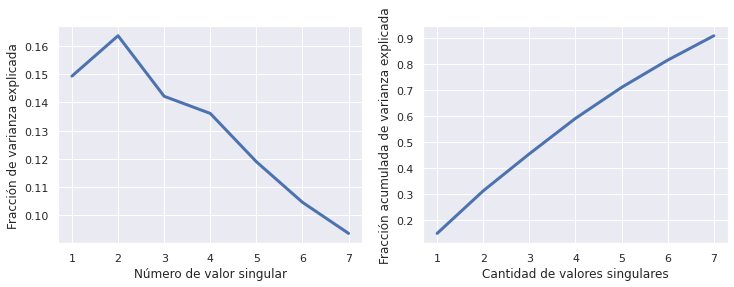

In [ ]:
## para louvain
#comunidad_louvain =[]
#for key, value in com_lv.items(): 
#    if value == 0:
#      comunidad_louvain.append(key)

comunidad=lista_de_clusters_lv[6]
titulos_comunidad=[]

for x in np.arange(0,len(comunidad),1,int):
  titulo=labels_titulo[comunidad[x]]
  titulos_comunidad = np.concatenate((titulos_comunidad, titulo), axis=None)

# Tomamos solo las obras de cada comunidad
#df_comunidad= df[(df['Title'] == [x for x in titulos_comunidad ]).copy()]

# Reseteamos el índice
#df_comunidad.reset_index(drop = True, inplace = True)

#df_comunidad
df_autores = pd.DataFrame()
ids=df["Title"].value_counts().index
for id in titulos_comunidad:
  df1 = df[(df['Title']==id)]
  df_autores = df_autores.append(df1, ignore_index=True)

palabretes = ["porejemplo", "poreso","buenosaires","continuó", "andrea", "medetuve", "medijo","elcomisario","talvez","daniel","celina","jack", "antonio","facundo","ambién","miguel","laura", "veras", "mariano", "rosario", "cortázar", "esteban","ramírez", "natalia", "paula", "puig", "celina", "johnny", "abía","girondo","wilkins","entoncesel", "quéel", "oliverio","últim","novela","daba","ejor","entos","dije","clara","rita","santiago","pedro","rema","raba","policiales","dela","barra","pancho","dora","mary","julia","molinari","fang","quizás","carlos", "pierre", "funes", "abenjaldún","andrés","martín","quizá","pablo","adela","brando", "lucía", "riera", "gabriela", "soldi", "diana","nula","lena","susano","tomatis","strauss","gutiérrez","elisa","mesiano","mahler","verani","dorm", "adem","asom","seldom","maría","juan","algún","alguna","algunas","alguno","algunos","ambos","ampleamos","ante","antes","aquel","aquellas","aquellos","aqui","arriba","atras","bajo","bastante","bien","cada","cierta","ciertas","cierto","ciertos","como","con","conseguimos","conseguir","consigo","consigue","consiguen","consigues","cual","cuando","dentro","desde","donde","dos","el","ellas","ellos","empleais","emplean","emplear","empleas","empleo","en","encima","entonces","entre","era","eramos","eran","eras","eres","es","esta","estaba","estado","estais","estamos","estan","estoy","fin","fue","fueron","fui","fuimos","gueno","ha","hace","haceis","hacemos","hacen","hacer","haces","hago","incluso","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","la","largo","las","lo","los","mientras","mio","modo","muchos","muy","nos","nosotros","otro","para","pero","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","por","por", "qué","porque","primero","puede","pueden","puedo","quien","sabe","sabeis","sabemos","saben","saber","sabes","ser","si","siendo","sin","sobre","sois","solamente","solo","somos","soy","su","sus","también","teneis","tenemos","tener","tengo","tiempo","tiene","tienen","todo","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","tuyo","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","va","vais","valor","vamos","van","vaya","verdad","verdadera","verdadero","vosotras","vosotros","voy","yo","él","ésta","éstas","éste","éstos","última","últimas","último","últimos","a","añadió","aún","actualmente","adelante","además","afirmó","agregó","ahí","ahora","al","algo","alrededor","anterior","apenas","aproximadamente","aquí","así","aseguró","aunque","ayer","buen","buena","buenas","bueno","buenos","cómo","casi","cerca","cinco","comentó","conocer","consideró","considera","contra","cosas","creo","cuales","cualquier","cuanto","cuatro","cuenta","da","dado","dan","dar","de","debe","deben","debido","decir","dejó","del","demás","después","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","durante","e","ejemplo","ella","ello","embargo","encuentra","esa","esas","ese","eso","esos","está","están","estaban","estar","estará","estas","este","esto","estos","estuvo","ex","existe","existen","explicó","expresó","fuera","gran","grandes","había","habían","haber","habrá","hacerlo","hacia","haciendo","han","hasta","hay","haya","he","hecho","hemos","hicieron","hizo","hoy","hubo","igual","indicó","informó","junto","lado","le","les","llegó","lleva","llevar","luego","lugar","más","manera","manifestó","mayor","me","mediante","mejor","mencionó","menos","mi","misma","mismas","mismo","mismos","momento","mucha","muchas","mucho","nada","nadie","ni","ningún","ninguna","ningunas","ninguno","ningunos","no","nosotras","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","otra","otras","otros","parece","parte","partir","pasada","pasado","pesar","poca","pocas","poco","pocos","podrá","podrán","podría","podrían","poner","posible","próximo","próximos","primer","primera","primeros","principalmente","propia","propias","propio","propios","pudo","pueda","pues","qué","que","quedó","queremos","quién","quienes","quiere","realizó","realizado","realizar","respecto","sí","sólo","se","señaló","sea","sean","según","segunda","segundo","seis","será","serán","sería","sido","siempre","siete","sigue","siguiente","sino","sola","solas","solos","son","tal","tampoco","tan","tanto","tenía","tendrá","tendrán","tenga","tenido","tercera","toda","todas","todavía","todos","total","trata","través","tres","tuvo","usted","varias","varios","veces","ver","vez","y","ya","menos","casi","mismo","olivari","sino", "todas", "toda","cada","ahora", "entonces", "sólo", "podía","aquel","cómo", "aquél","dijo", "después", "siempre", "hacia", "bien","carla","carmen","luis","mauro", "chica", "lucio", "gloria", "mario","isabel", "nene", "hassam", "delia", "dorda", "malito", "brena", "nurit","rengo","silva", "iscar", "jaime",  "mereles"]
for i in palabretes:
  stopwords.append(i)


# Creamos el objeto contador de palabras, pidiéndole que remueve
# las stopwords, los términos que aparecen en un único documento (min_df)
# y los términos que aparecen en más del 70% de los documentos (max_df).
# Esto es para eliminar palabras raras (o errores de tipeo) y
# términos que seguramente son stopwords no incluídos en la lista
#count = CountVectorizer(min_df =2, max_df = .4, stop_words = stopwords)
count = CountVectorizer(min_df = int(len(comunidad)/4),max_df=.7, stop_words=stopwords)
#count = CountVectorizer( stop_words=stopwords)
# Ajustamos con los datos. Acá especificamente creamos una matriz documentos-términos
x_count = count.fit_transform(df_autores['Text'])

# Dimensions de la matriz doc-tér
# print(x_count.shape)

# Creamos el objeto tf-idf. Le decimos además que devuelva los
# vectores documento con norma euclídea igual a 1 (norm = 'l2')
tfidf = TfidfTransformer(norm = 'l2')

# Creamos la matriz tf-idf a partir de la matriz de frecuencias
x_tfidf = tfidf.fit_transform(x_count)

# Dimensión del espacio reducido
n_components = len(comunidad)-1
# Creación del objeto SVD
svd = TruncatedSVD(n_components = n_components)

# Ajuste con los datos y descripción en el espacio reducido
# Trabajamos con la matriz traspuesta
x_svd = svd.fit_transform(x_tfidf.T)

# Dimensión de la matriz de datos en el espacio reducido
print(x_svd.shape)

# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = svd.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '-', linewidth = 3)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de valor singular')

# Calculamos el acumulado con la función cumsum de numpy
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '-', linewidth = 3)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de valores singulares')
plt.show()




## Tópicois de c/ comunidad

In [ ]:
from collections import Counter

# Get the full vocabulary
vocabulary = count.get_feature_names()

# Get the term frequencies
term_frequencies = x_count.toarray().sum(axis=0)

# Create a Counter object
counter = Counter(dict(zip(vocabulary, term_frequencies)))

# Get the 10 most frequent terms
print(counter.most_common(25))

[('doña', 466), ('señora', 172), ('madre', 170), ('chicos', 149), ('perro', 147), ('mira', 114), ('ventana', 79), ('alberto', 78), ('cocina', 76), ('olor', 71), ('plaza', 70), ('suelo', 68), ('alma', 66), ('españa', 66), ('torno', 66), ('felipe', 64), ('gallego', 63), ('libro', 63), ('carro', 61), ('doctor', 61), ('nombre', 61), ('patio', 61), ('santo', 61), ('seguida', 60), ('negros', 59)]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


(8, 2)
profesor, sueño, carta, cocina, mirando, capitán, verde, puente, pueblo, sombrero


comisario, señores, estudio, crimen, pintor, parcialmente, asesino, tientas, odos, doctor




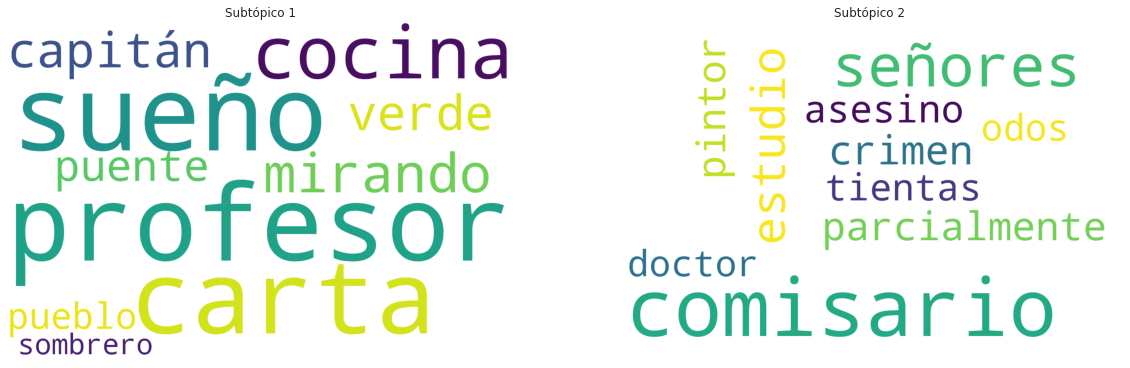

In [ ]:
#topicos por comunidad
n_topic_components =2
# Construímos el objeto NMF con los tópicos indicados 
nmf = NMF(n_components = n_topic_components)

# Aplicamos sobre nuestros datos
x_nmf = nmf.fit_transform(x_tfidf)

# Dimensión de la matriz transformada

print(x_nmf.shape)


from wordcloud import WordCloud
# Objeto índice: término de nuestro vocabulario
vocabulary = {item: key for key, item in count.vocabulary_.items()}

# Para cada componente
for n in range(n_topic_components):
  # Ordenamos una lista del largo de nuestro vocabulario según el peso en cada componente y nos quedamos con los primeros 10
  list_sorted = sorted(range(nmf.components_.shape[1]), reverse = True, key = lambda x: nmf.components_[n][x])[:10]

  # Printeamos los términos asociados a los valores más grande de cada una de las componentes
  print(', '.join([vocabulary[i] for i in list_sorted]))
  print('\n')

wc_atributos = {'height' : 800,
                'width' : 1200,
                'background_color' : 'white',
                'max_words' : 20
                } # Defino los parámetros que les voy a pasar a los wordclouds

# Creo la figura
fig, axs = plt.subplots(1,n_topic_components, figsize = (20,10) )

# Recorro para todas las componentes
for n in range(n_topic_components):

  # 10 términos más pesados
  list_sorted = sorted(range(len(vocabulary)), reverse = True, key = lambda x: nmf.components_[n][x])[:10]

  # Diccionario término: peso
  comp_dict = {vocabulary[i]: nmf.components_[n][i] for i in list_sorted}

  # Creo el wordlcoud
  wc = WordCloud(**wc_atributos # De esta forma, le estoy diciendo a la función que expanda el diccionario de atributos de forma tal de que entienda lo que quiero que haga
                 ).generate_from_frequencies(comp_dict)


  axs[n].set_title('Subtópico {}'.format(n+1))
  axs[n].imshow(wc)
  axs[n].axis('off')

  #axs.set_title('Tópico {}'.format(n))
  #axs.imshow(wc)
  #axs.axis('off')
plt.show()


## subgrafos

<ipython-input-275-c3d3cd2d77b2>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
<ipython-input-275-c3d3cd2d77b2>:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


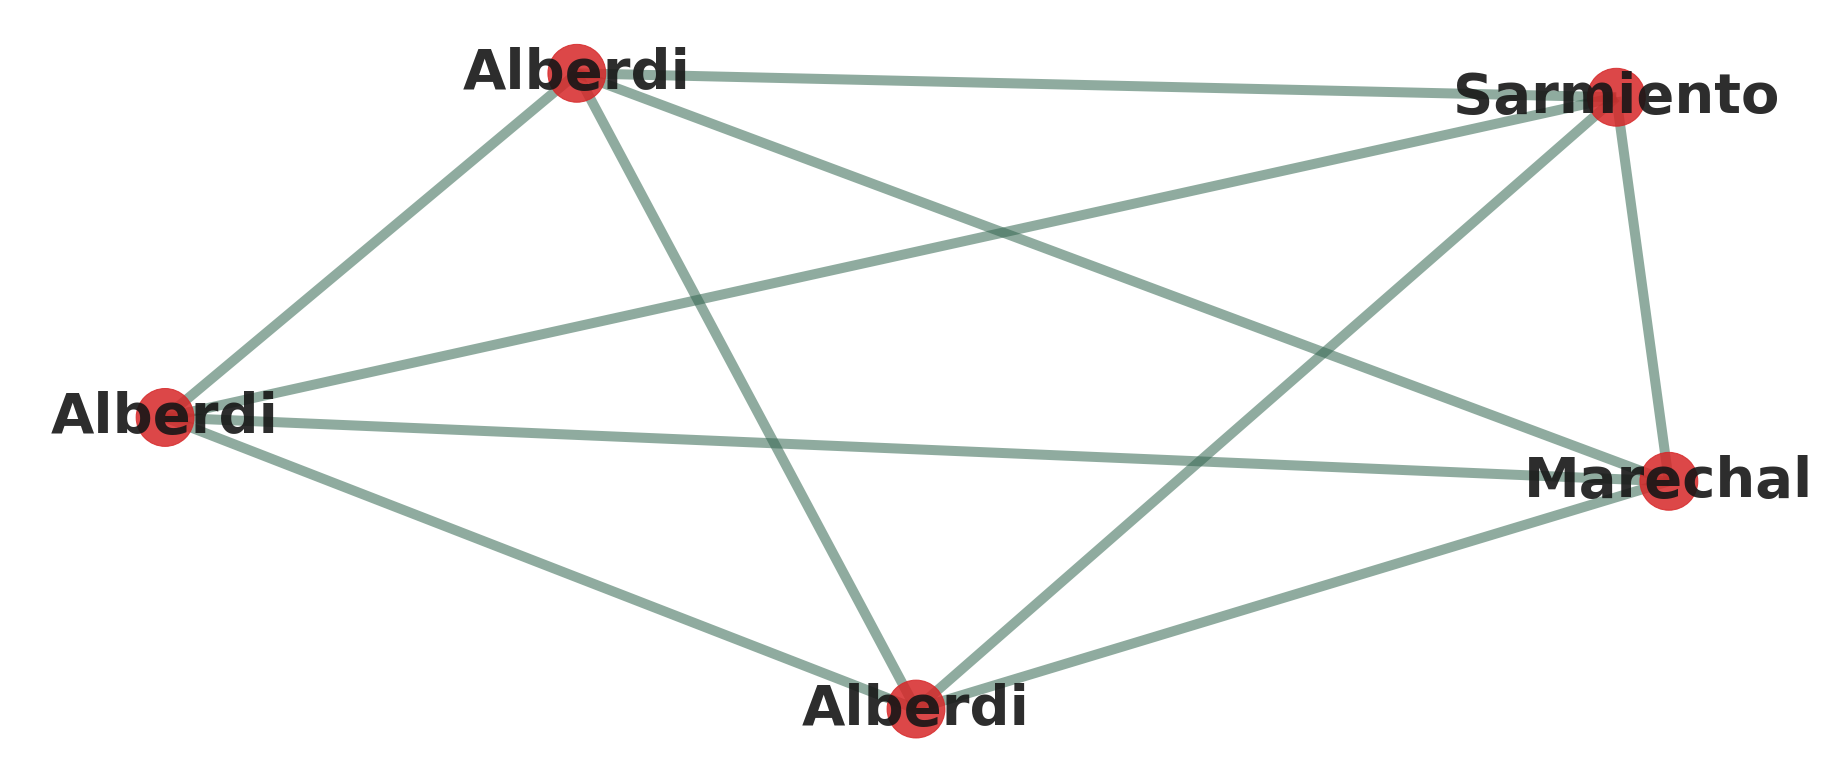

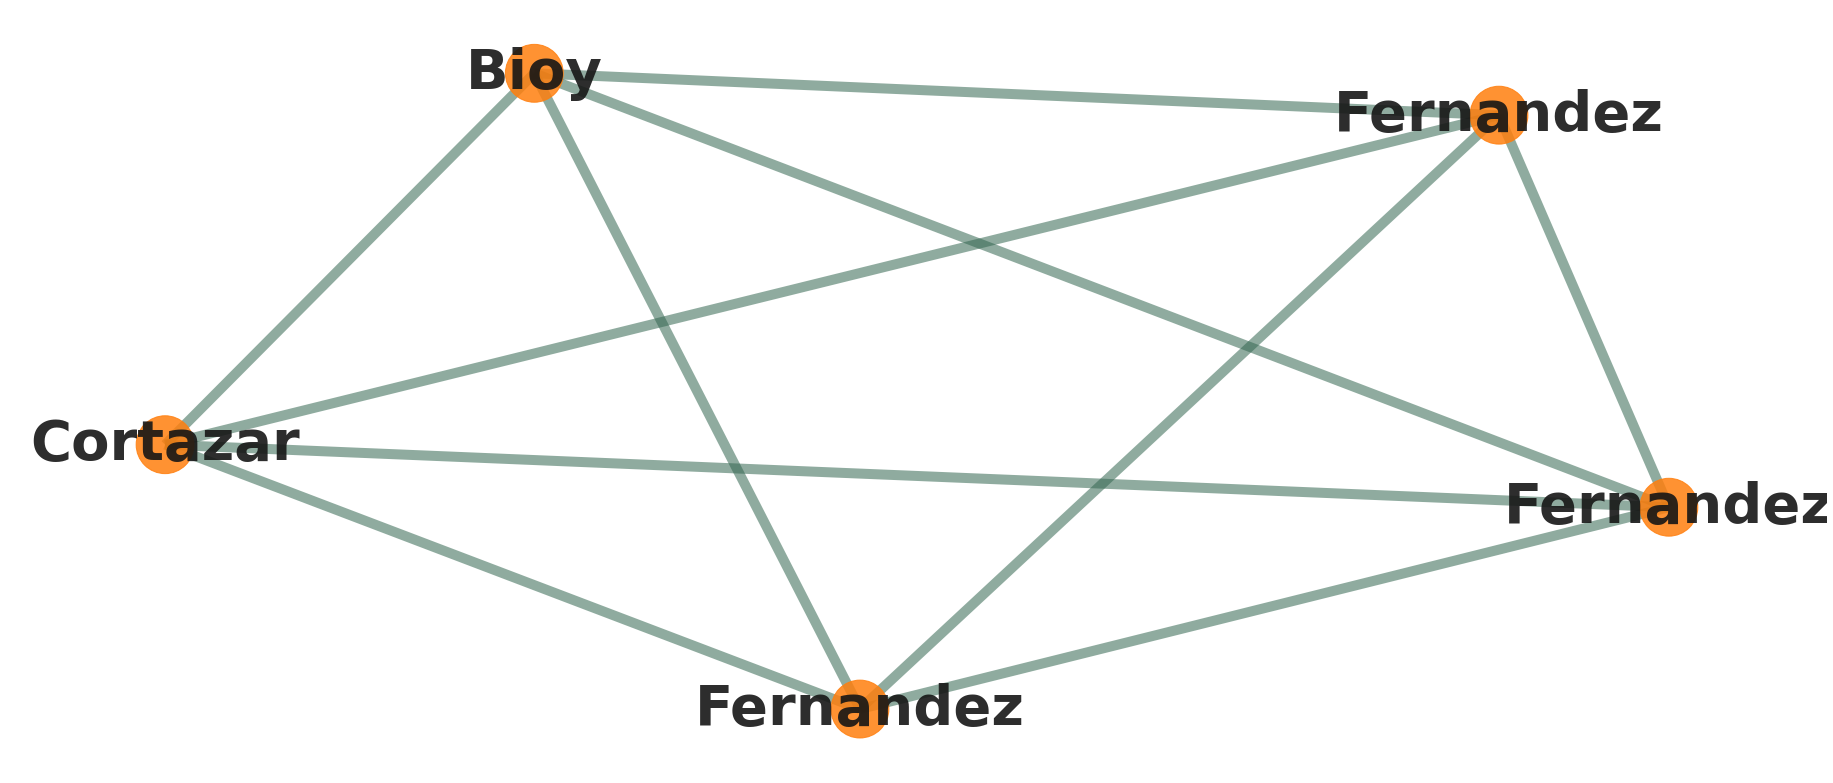

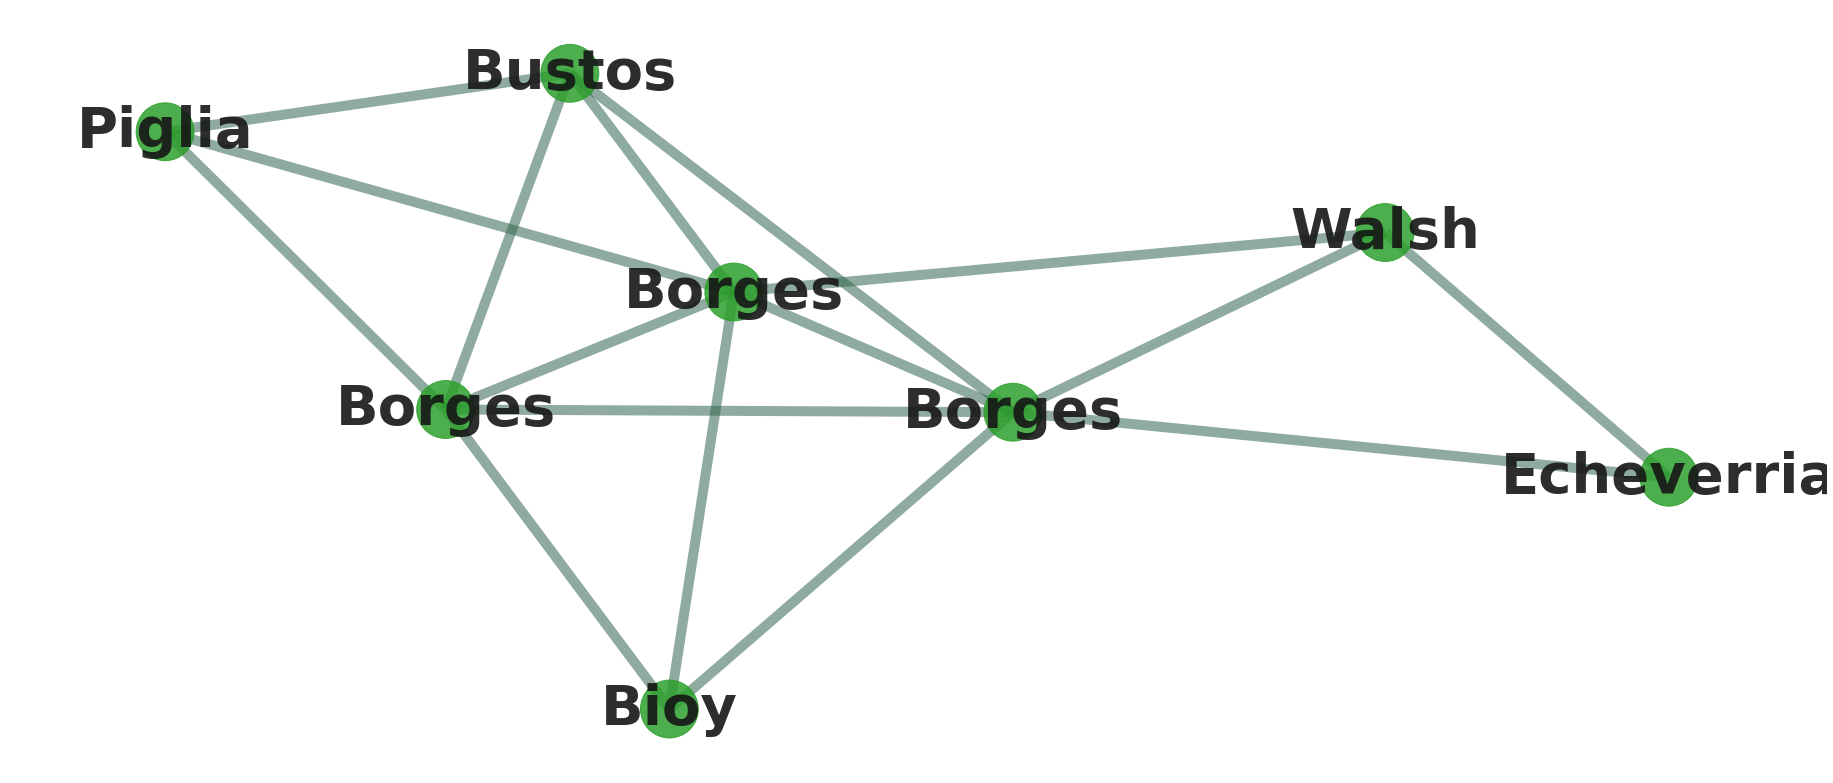

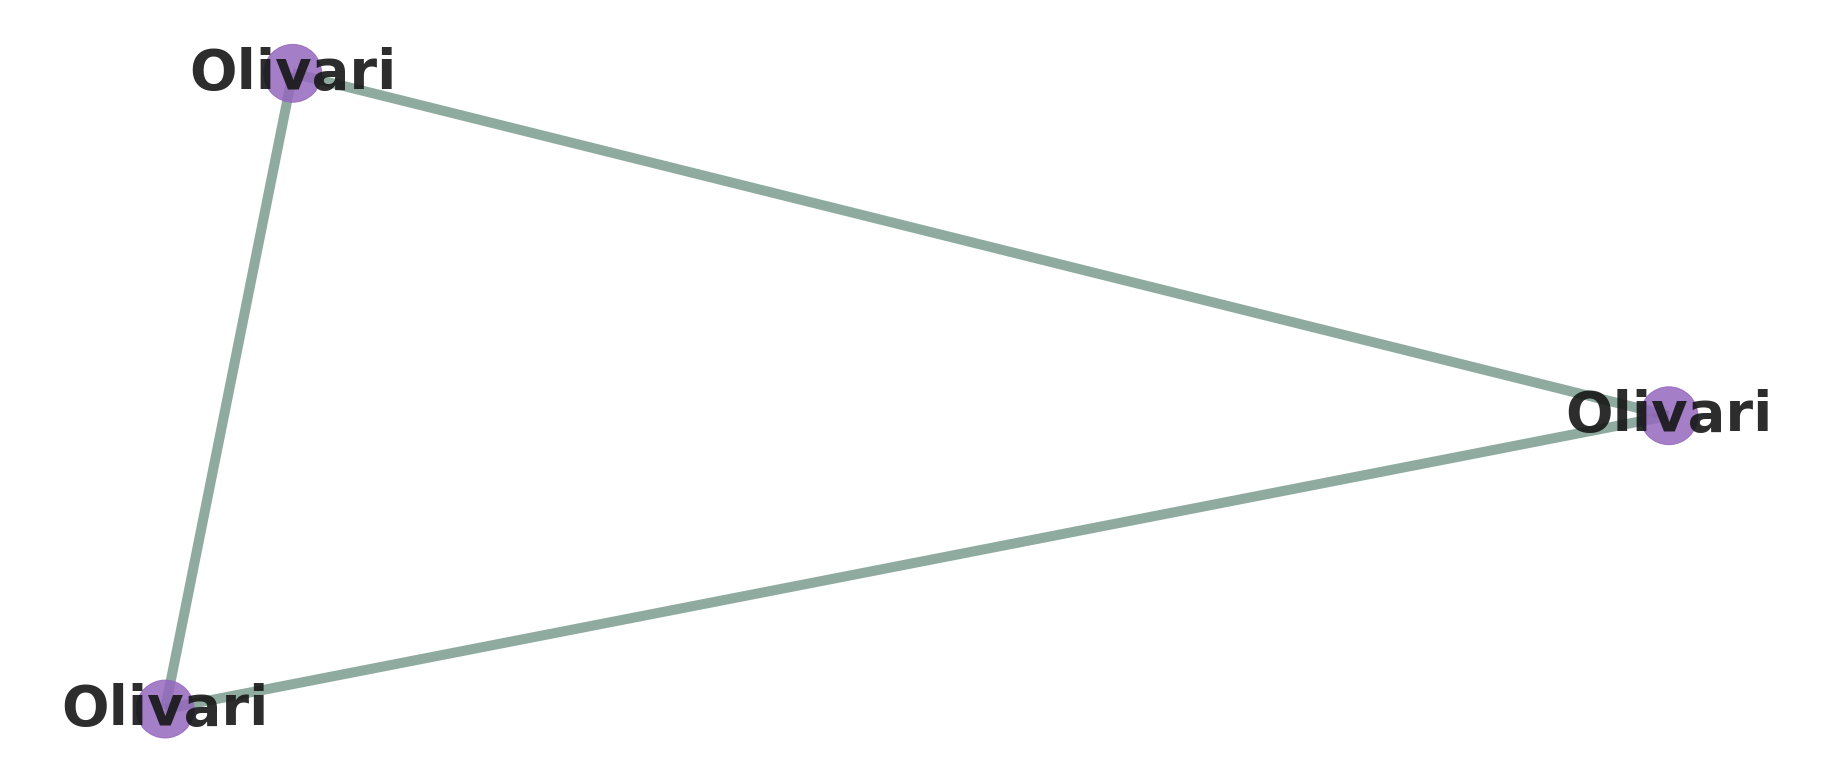

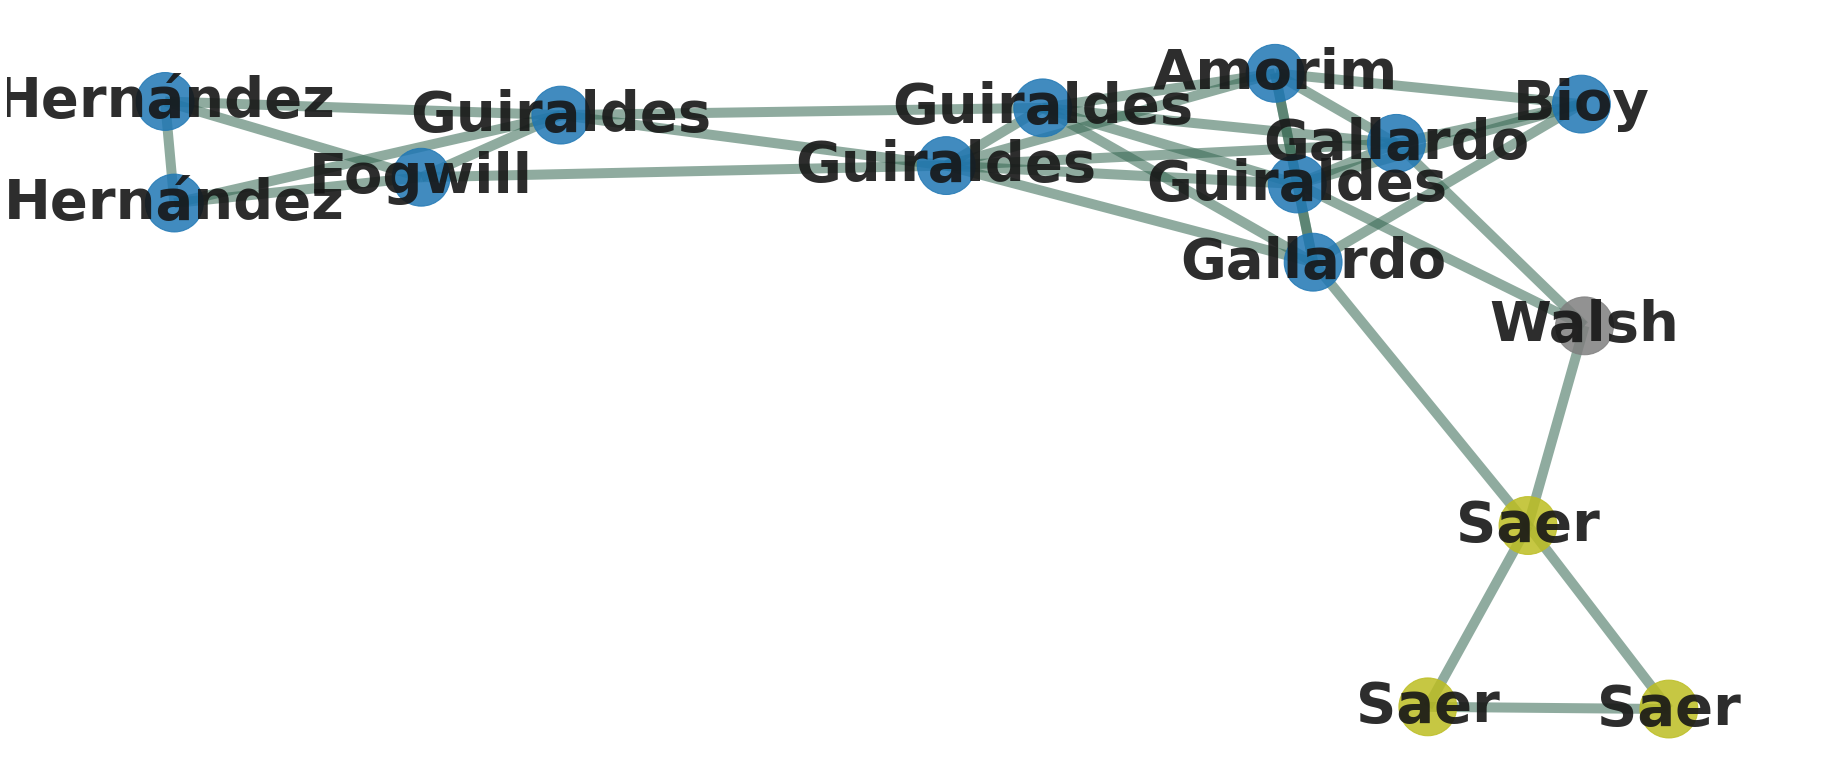

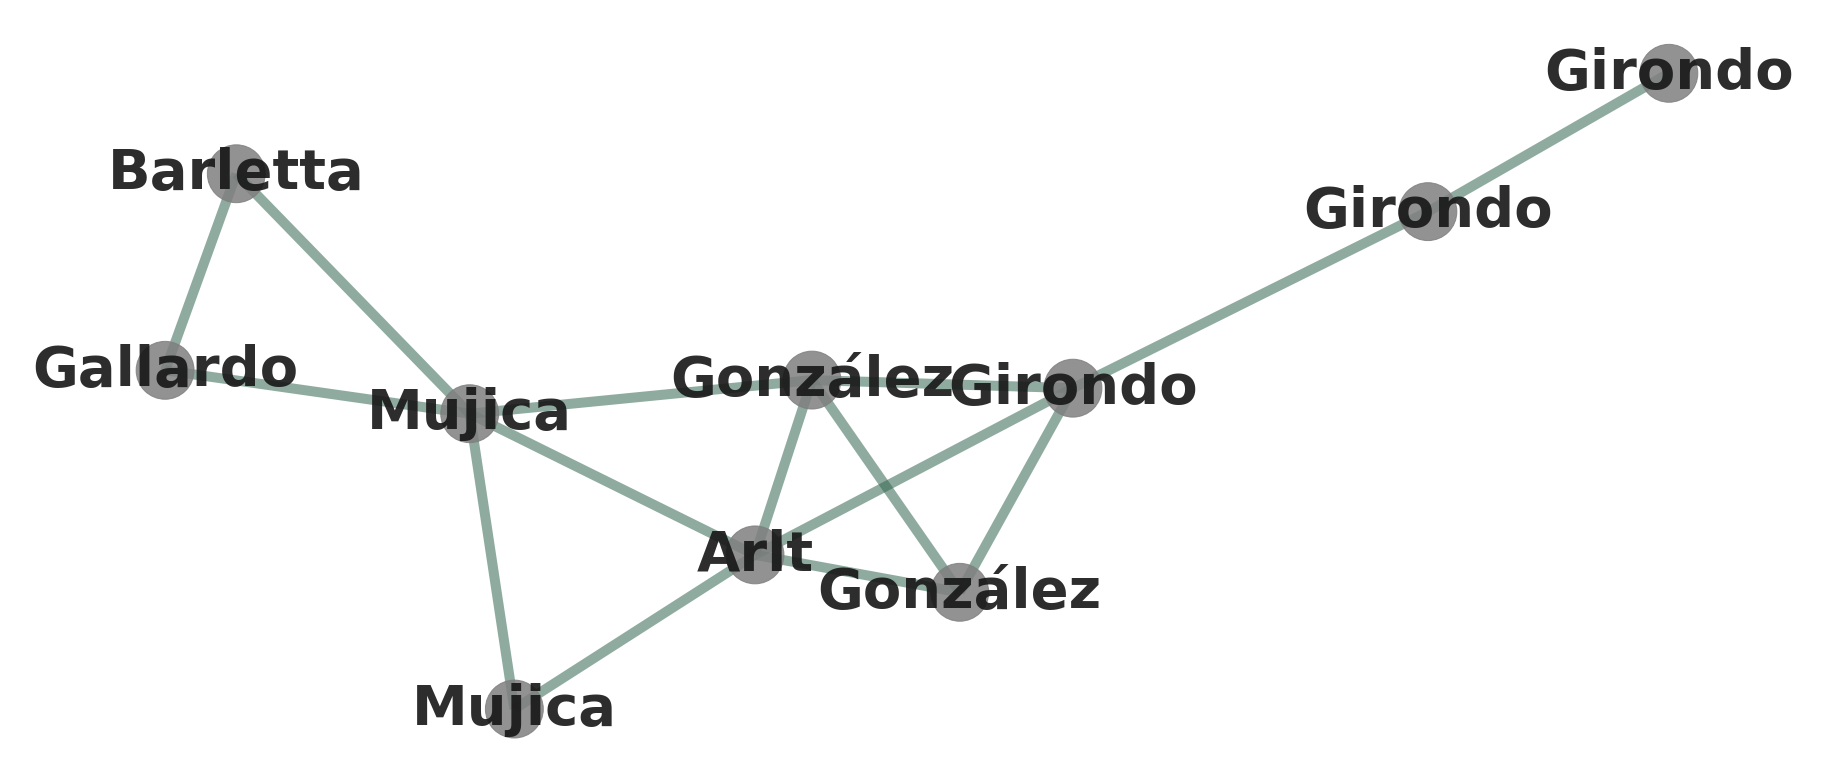

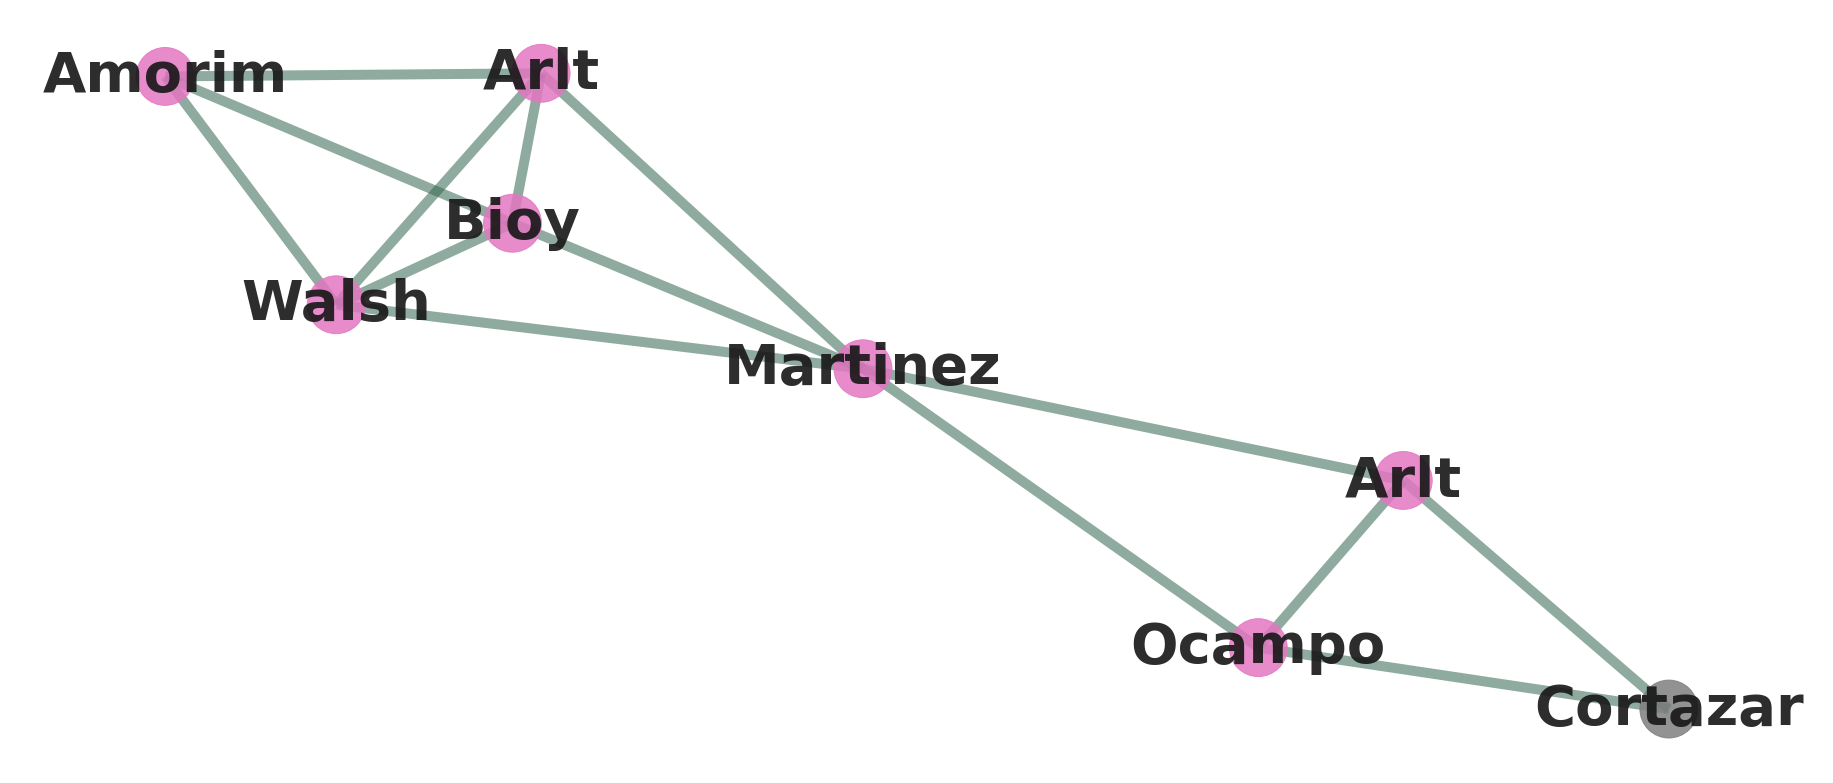

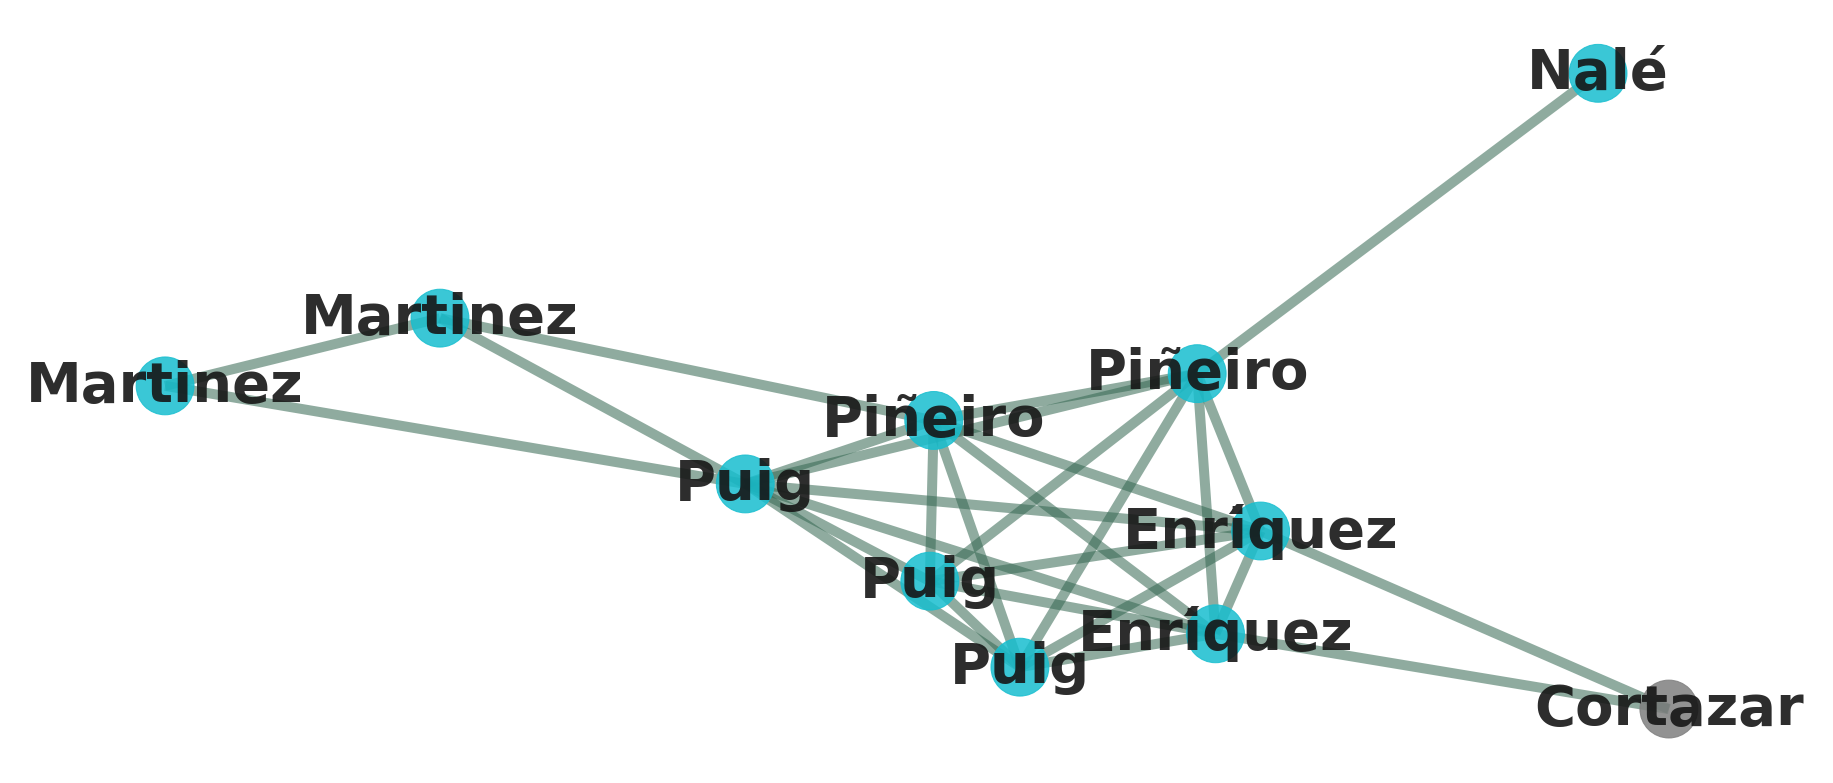

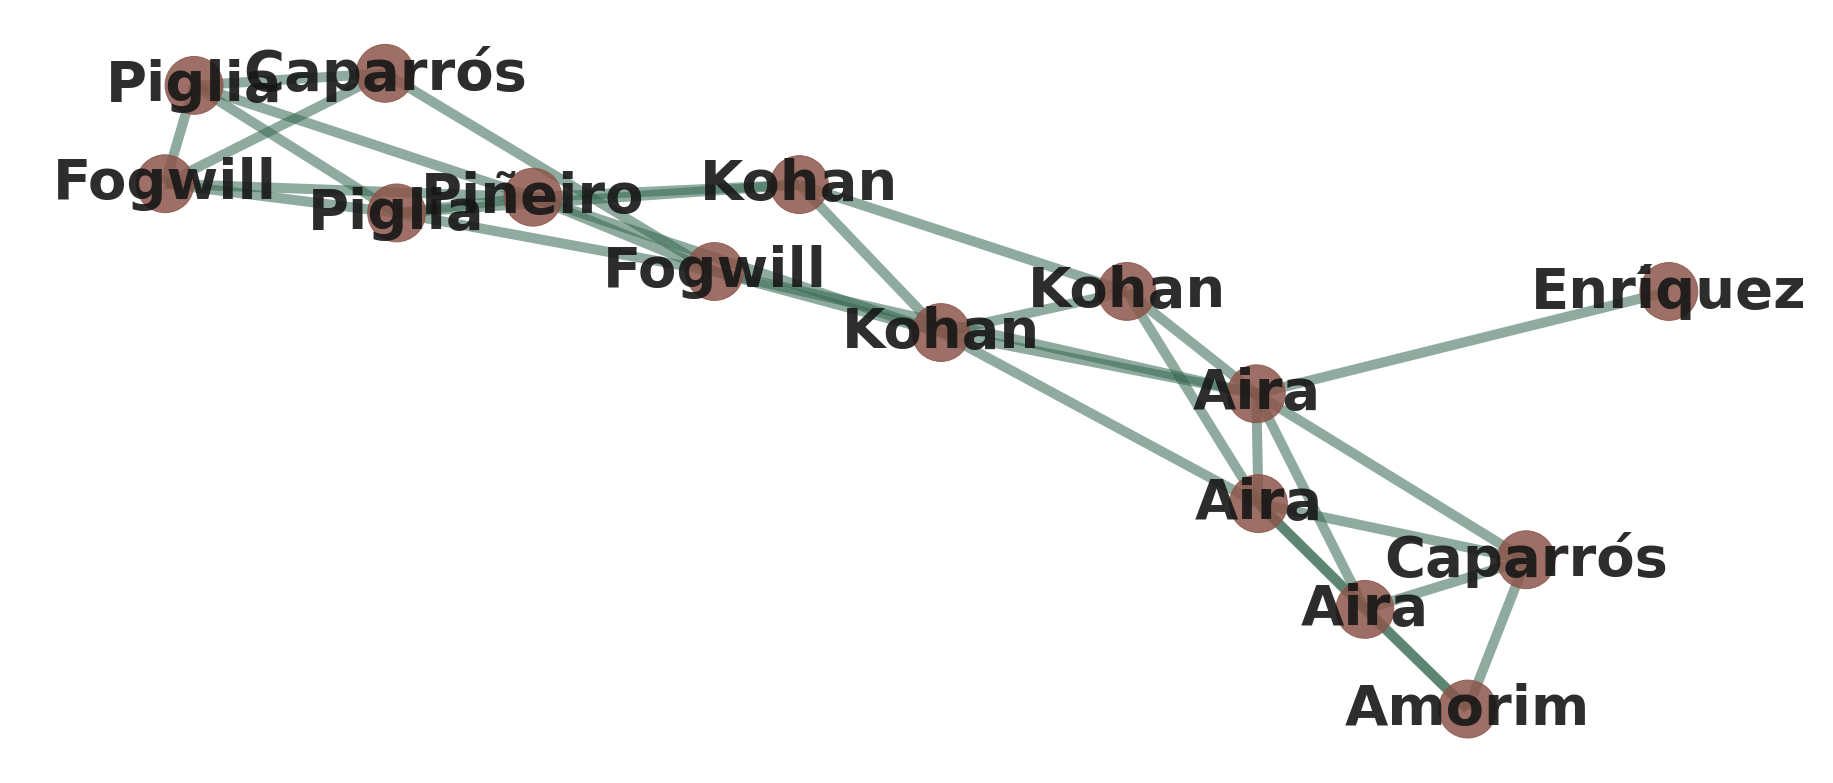

In [ ]:
lista_de_subgrafos = []
for i in lista_de_clusters_lv:
  lista_de_subgrafos.append(nx.subgraph(G,i))
#age_map = {age: cmap(float(age - 1860)/(2010- 1860)) for age in df['Age']}
colorss=["#994ea2","#4caf4b","#e41b1d","#397eb8","#fe8000"]
#,"#feff32"
#node_colors = [colorss[n] for n in subgrafo.nodes()]
#pos = nx.layout.fruchterman_reingold_layout(G,k=0.3)
#pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G,k=0.7)
#pos = nx.spring_layout(,k=4/np.sqrt(G.order()))
for i in range(len(lista_de_subgrafos)):
    ax = fig.add_subplot(111)
    ax.set_facecolor('none')
    ax.set_alpha(0)
    nodos = lista_de_clusters_lv[i]
    subgrafo = lista_de_subgrafos[i]
    list(subgrafo.nodes())
    colores=[]
    for j in list(subgrafo.nodes()):
      if df['Grupo'][j]==' Florida':
        color='red'
      elif df['Grupo'][j]==' Boedo':
        color='blue'
      else:
        color='black'
      colores=np.append((colores),(color))
    labels = {v: str(df['Author'][v].split()[0].split(",")[0]) for v in subgrafo.nodes()}
    #labels = {v: str(df['Title'][v]) for v in subgrafo.nodes()}
    node_colors = [colors[n] for n in subgrafo.nodes()]
    pos = nx.spring_layout(subgrafo,k=4/np.sqrt(G.order()))
    plt.figure(figsize=(150,150))
    plt.subplot(len(lista_de_subgrafos),4,i+1)
    nx.draw_networkx_nodes(subgrafo,
                           pos = pos,
                           node_size = 3350,
                           node_color = [plt.get_cmap('tab10')(particiones[0][v]) for v in subgrafo.nodes()],
                           alpha=0.85)
    nx.draw_networkx_edges(subgrafo,width=10,
                           pos = pos,
                           edge_color="#346751",
                           alpha = .55)
    nx.draw_networkx_labels(subgrafo,
                       pos = pos,
                       labels = labels,font_size=56,font_family='sans-serif',font_weight='bold',font_color="#161616",alpha=0.9)
    plt.grid(False)
    plt.axis('off')
    ax = fig.add_subplot(111)
    ax.set_facecolor('none')
    ax.set_alpha(0)
    #plt.savefig('my_plot'+str(i)+'.png', transparent=True)
    plt.show()

### Subcomunidades


In [ ]:
subG = lista_de_subgrafos[6]
# louvain 
com_lv = com.best_partition(subG)
print('----------------------')
print(com_lv) # Es un diccionario!
print(f'La modularidad de esta partición es: {com.modularity(com_lv, subG)}')

----------------------
{35: 1, 4: 0, 37: 0, 68: 1, 8: 1, 9: 0, 14: 0, 52: 1}
La modularidad de esta partición es: 0.2867137064250788


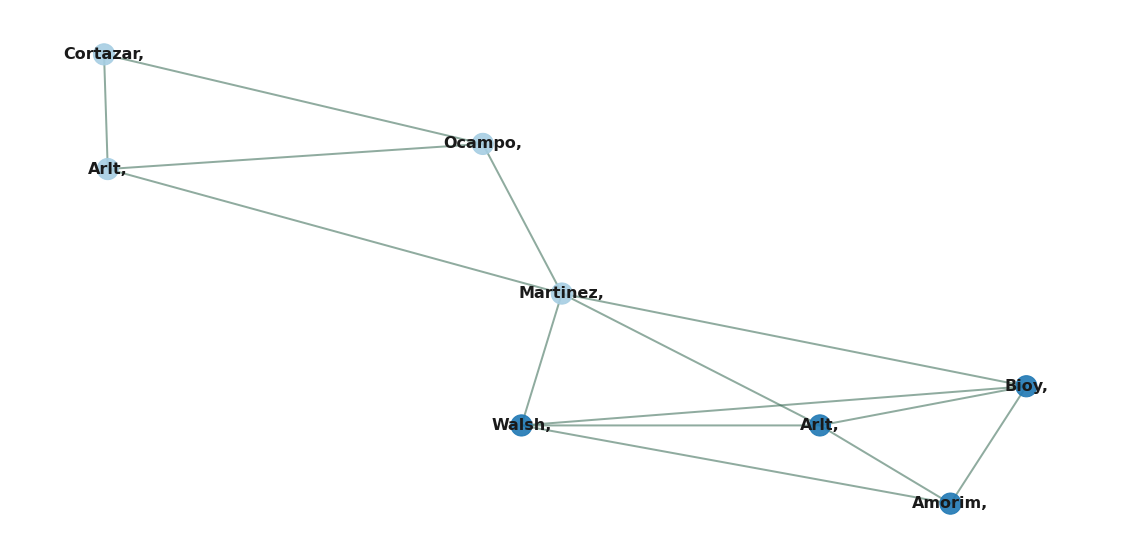

In [ ]:
pos = nx.spring_layout(subG,k=1/np.sqrt(subG.order()))
particiones = [com_lv]

fig, axs = plt.subplots(1, 1, figsize = (20, 10))
 
for i, ax in enumerate(fig.axes):
    nx.draw_networkx_nodes(subG,
                           pos = pos,
                           node_color = [plt.get_cmap('Paired')(particiones[i][v]) for v in subG.nodes()],
                           ax = ax,
                           node_size = 450,
                           alpha= .9)
    nx.draw_networkx_edges(subG,width=2,
                           pos = pos,
                           edge_color="#346751",
                           alpha = .55)
    nx.draw_networkx_labels(subG,
                       pos = pos,
                       ax = ax,
                       labels = {v: str(df['Author'][v].split()[0]) for v in subG.nodes()},font_size=16,font_weight='bold',alpha=1)
    plt.grid(False)
    ax.axis('off')
    ax = plt.gca() # Get current axes
    ax.set_alpha(0.0) # Set background transparency
plt.show()


# Centralidades 

In [ ]:
Red = G.copy()
diccionario_centralidad_grado = nx.degree_centrality(Red)
diccionario_centralidad_intermediatez = nx.betweenness_centrality(Red, k=None, normalized=True, weight=None, endpoints=False, seed=None)
diccionario_centralidad_autovalor = nx.eigenvector_centrality(Red, max_iter=100, tol=1e-06, nstart=None, weight='weight')
diccionario_centralidad_cercania = nx.closeness_centrality(Red, u=None, distance=None, wf_improved=True)


def sacar_max_centralidad_degree(Red):
  # Calcula la centralidad de autovalor
  centralidad = nx.degree_centrality(Red)
  # Devuelve el nodo de máxima centralidad
  return max(centralidad, key=centralidad.get)

def sacar_max_centralidad_betweenness(Red):
  # Calcula la centralidad de autovalor
  centralidad = nx.betweenness_centrality(Red, k=None, normalized=True, weight=None, endpoints=False, seed=None)
  # Devuelve el nodo de máxima centralidad
  return max(centralidad, key=centralidad.get)

def sacar_max_centralidad_eigenvalue(Red):
  # Calcula la centralidad de autovalor
  centralidad = nx.eigenvector_centrality(Red, max_iter=100, tol=1e-06, nstart=None, weight='weight')
  # Devuelve el nodo de máxima centralidad
  return max(centralidad, key=centralidad.get)

def sacar_max_centralidad_closeness(Red):
  # Calcula la centralidad de autovalor
  centralidad = nx.closeness_centrality(Red, u=None, distance=None, wf_improved=True)
  # Devuelve el nodo de máxima centralidad
  return max(centralidad, key=centralidad.get)
print('Obras de Mayor centralidad segun la centralidad analizada')
print('Grado:',labels_titulo[sacar_max_centralidad_degree(G)])
print('Intermediatez:',labels_titulo[sacar_max_centralidad_betweenness(G)])
print('Autovalor:',labels_titulo[sacar_max_centralidad_eigenvalue(G)])
print('Cercania:',labels_titulo[sacar_max_centralidad_closeness(G)])

NameError: ignored

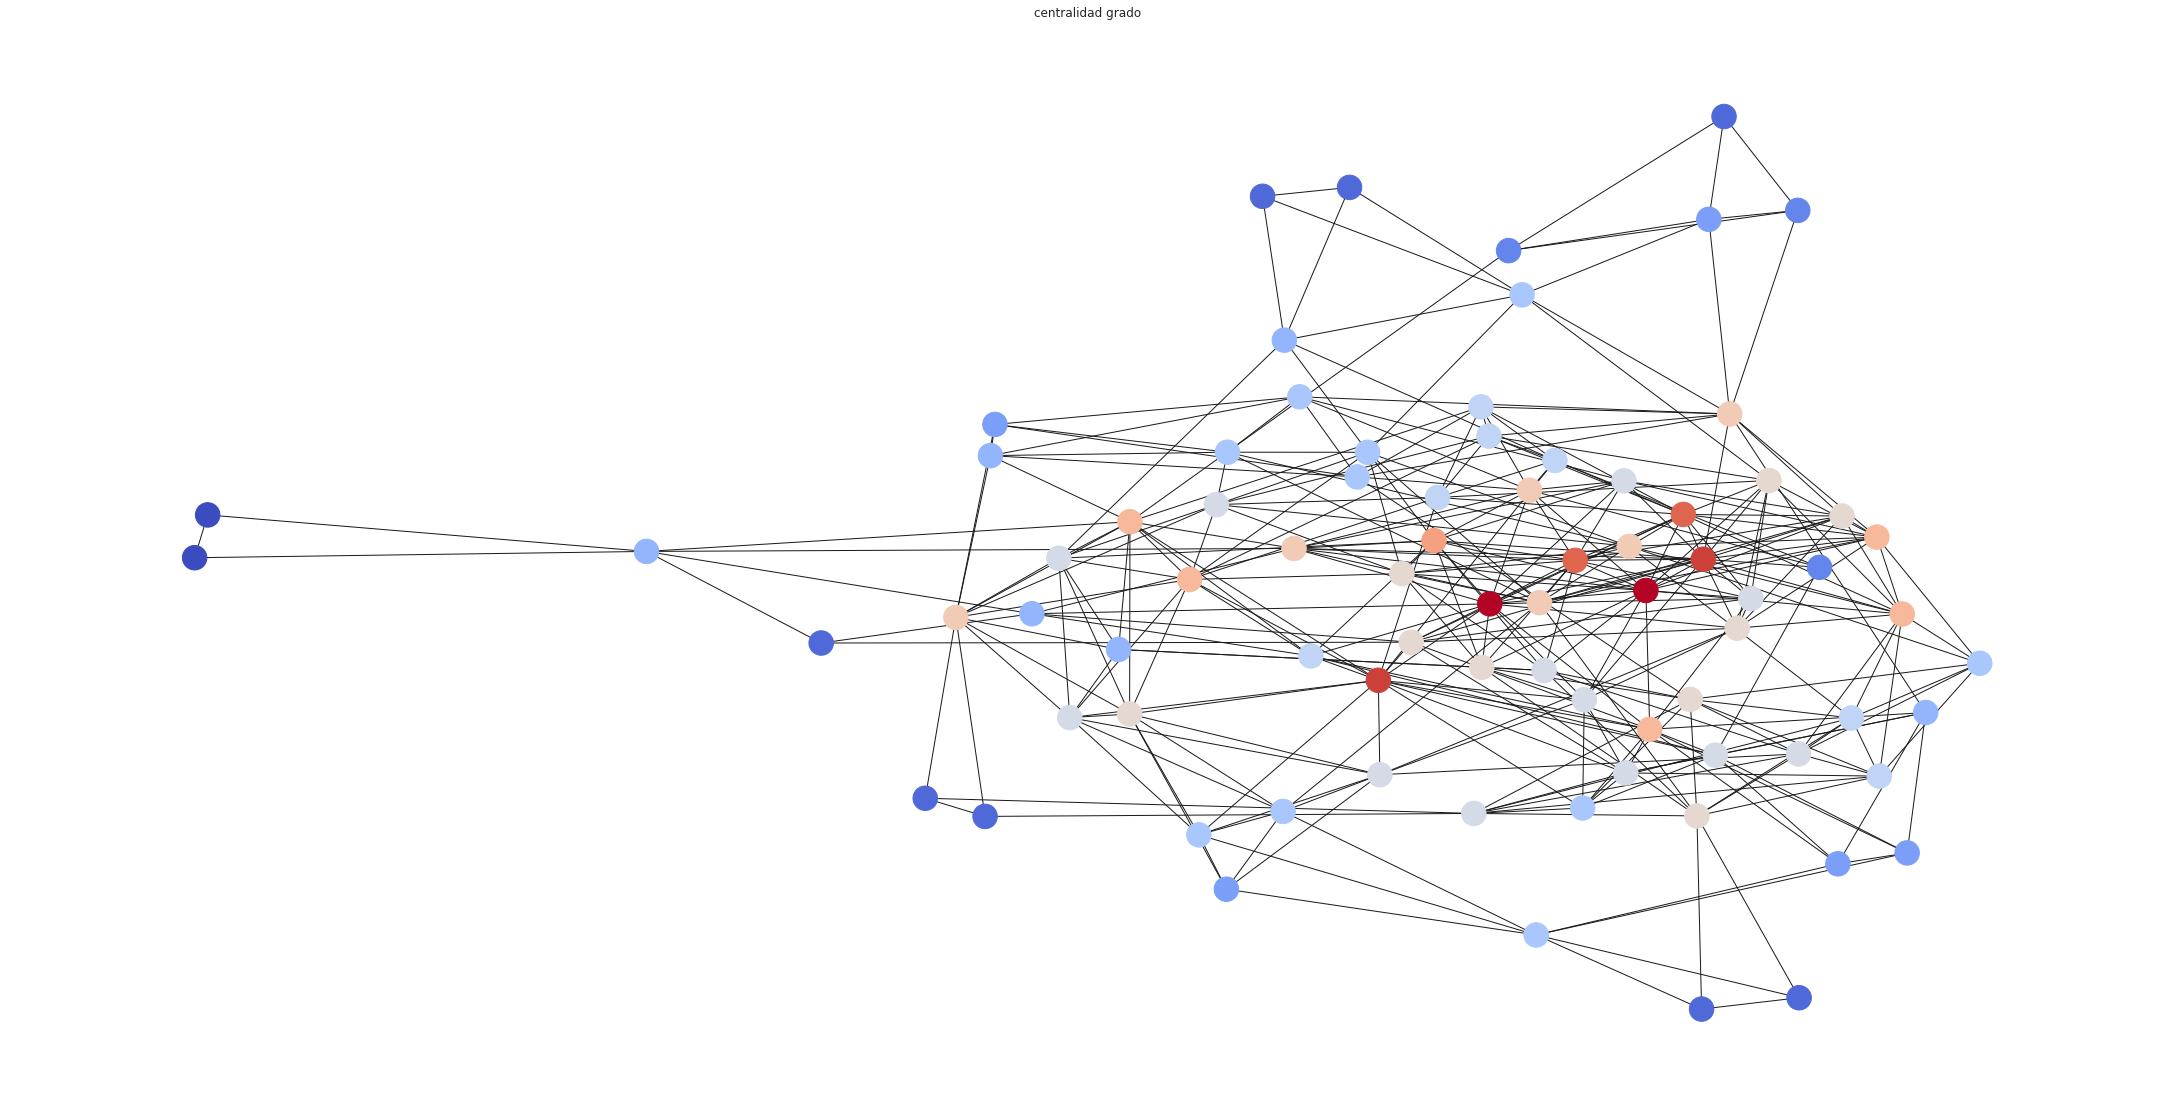

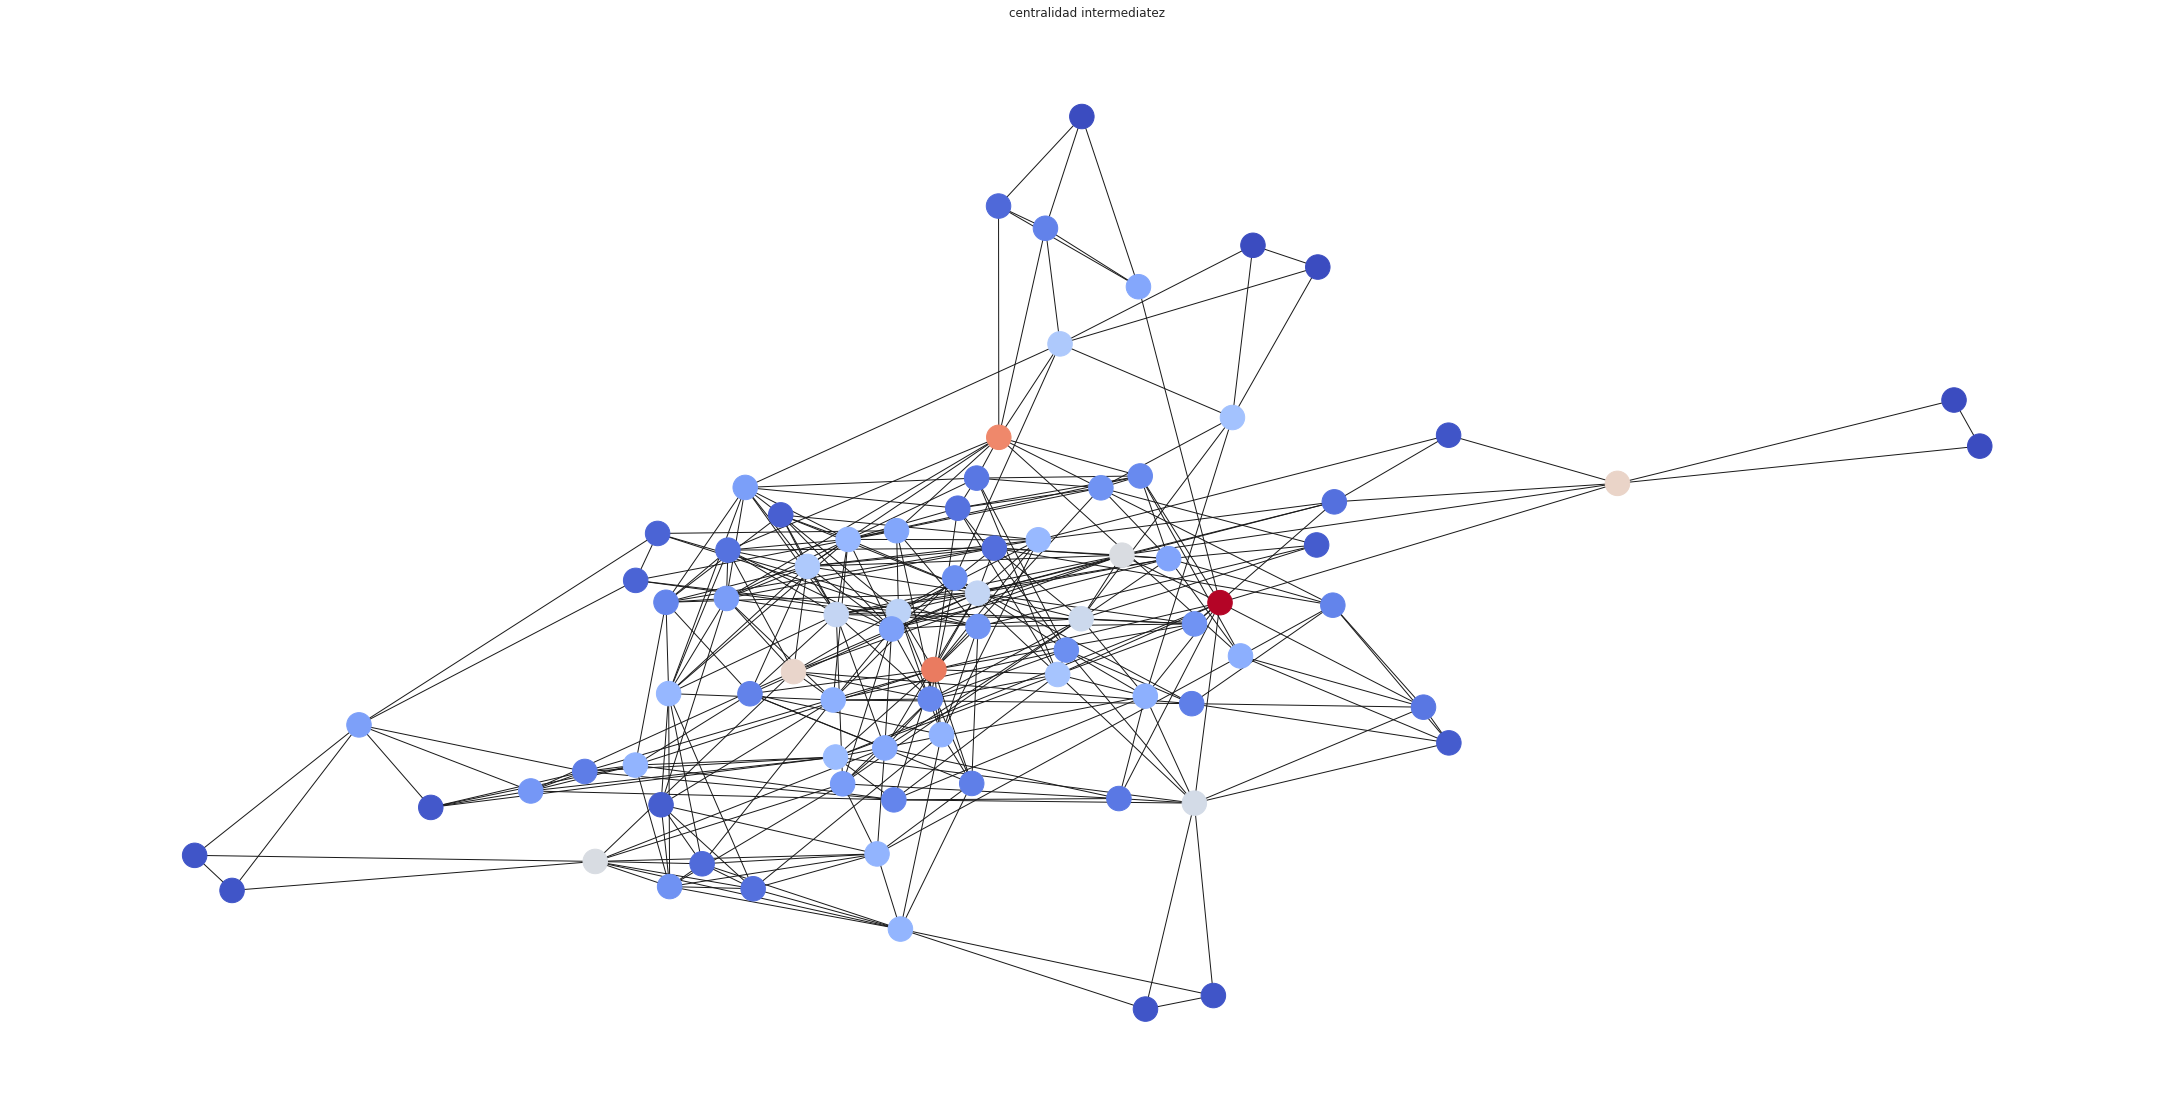

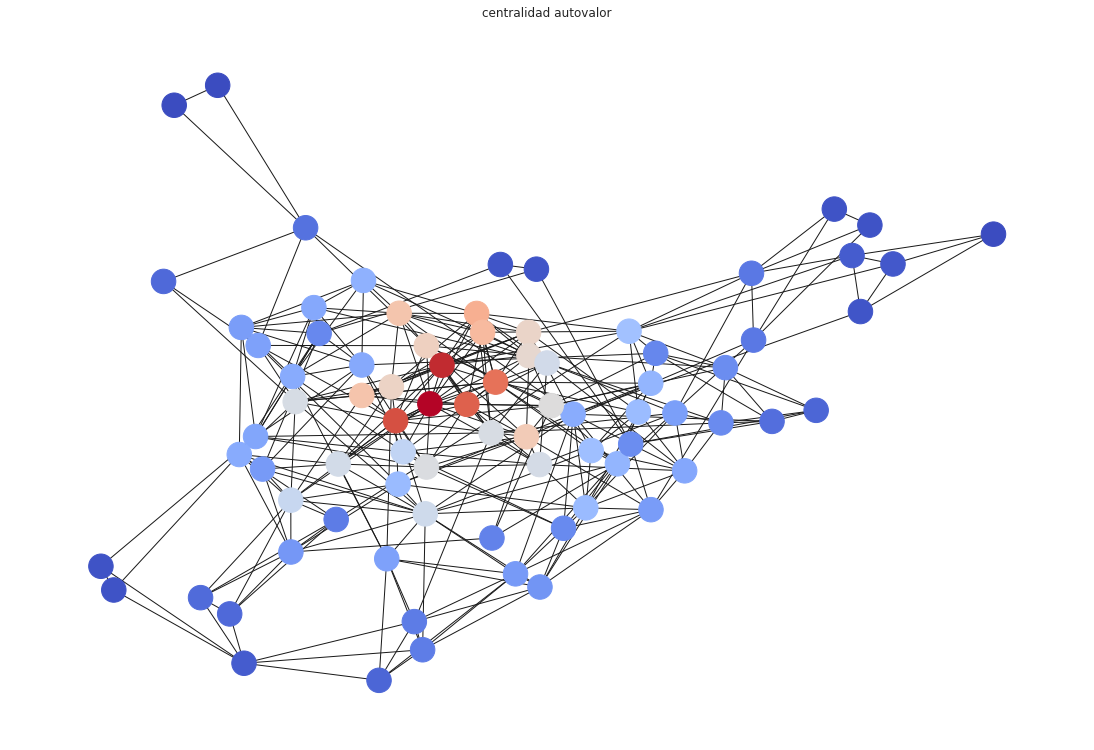

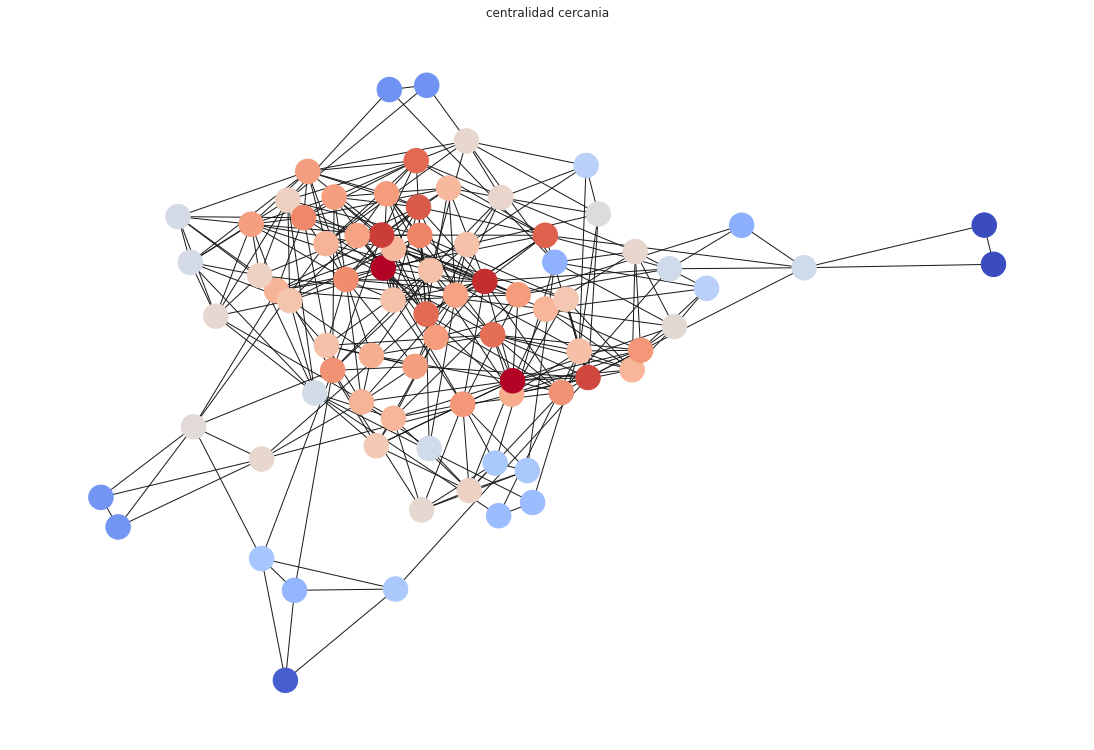

In [ ]:
import matplotlib as mpl
from pylab import rcParams
#grafiquemos
color_lookup=diccionario_centralidad_grado
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

rcParams['figure.figsize'] = 30,15
nx.draw(G, 
        nodelist=color_lookup,
        node_size=600,
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()])
#nx.draw_networkx_labels(G, pos, labels_autores, font_size=12)
plt.title('centralidad grado')
plt.show()


color_lookup=diccionario_centralidad_intermediatez
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

rcParams['figure.figsize'] = 30, 15
nx.draw(G, 
        nodelist=color_lookup,
        node_size=600,
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()], 
        with_labels=False)
#nx.draw_networkx_labels(G, pos, labels_autores, font_size=12)
plt.title('centralidad intermediatez')
plt.show()


color_lookup=diccionario_centralidad_autovalor
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

rcParams['figure.figsize'] = 15, 10
nx.draw(G, 
        nodelist=color_lookup,
        node_size=600,
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()], 
        with_labels=False)
#nx.draw_networkx_labels(G, pos, labels_autores, font_size=12)
plt.title('centralidad autovalor')
plt.show()


color_lookup=diccionario_centralidad_cercania
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

rcParams['figure.figsize'] = 15, 10
nx.draw(G, 
        nodelist=color_lookup,
        node_size=600,
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()], 
        with_labels=False)
#nx.draw_networkx_labels(G, pos, labels_autores, font_size=12)
plt.title('centralidad cercania')
plt.show()

In [ ]:
# Veamos la centralidad dentro de las comunidades
#FG

com0_fg=com_fg.as_clustering()[0]
com1_fg=com_fg.as_clustering()[1]
com2_fg=com_fg.as_clustering()[2]
com3_fg=com_fg.as_clustering()[3]
com4_fg=com_fg.as_clustering()[4]
com5_fg=com_fg.as_clustering()[5]
#com6_fg=com_fg.as_clustering()[6]

H = G_gigante.subgraph(com3_fg)
print('Fastgreddy')
print('Obras de Mayor centralidad segun la centralidad analizada')
print('Grado:',labels_titulo[sacar_max_centralidad_degree(H)],labels_autores[sacar_max_centralidad_degree(H)])
print('Intermediatez:',labels_titulo[sacar_max_centralidad_betweenness(H)],labels_autores[sacar_max_centralidad_betweenness(H)])
print('Autovalor:',labels_titulo[sacar_max_centralidad_eigenvalue(H)],labels_autores[sacar_max_centralidad_eigenvalue(H)])
print('Cercania:',labels_titulo[sacar_max_centralidad_closeness(H)],labels_autores[sacar_max_centralidad_closeness(H)])




Fastgreddy
Obras de Mayor centralidad segun la centralidad analizada
Grado:  Fragmento preliminar al estudio del derecho Alberdi, Juan Bautista 
Intermediatez:  Fragmento preliminar al estudio del derecho Alberdi, Juan Bautista 
Autovalor:  Fragmento preliminar al estudio del derecho Alberdi, Juan Bautista 
Cercania:  Fragmento preliminar al estudio del derecho Alberdi, Juan Bautista 
